# Using Tabula Sapiens as a reference for annotating new datasets
This notebook allows you to annotate your data with a number of annotation methods using the Tabula Sapiens dataset as the reference. 

Initial setup: 
1. Make sure GPU is enabled (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU)
2. We also highly recommend getting Colab PRO for access to a high ram session.


Integration Methods Provided:
- scVI [(Lopez et al. 2018)](https://www.nature.com/articles/s41592-018-0229-2)
- bbKNN [(Polański et al. 2020)](https://academic.oup.com/bioinformatics/article/36/3/964/5545955)
- Scanorama [(He et al. 2019)](https://www.nature.com/articles/s41587-019-0113-3)

Annotation Methods:
- KNN on integrated spaces
- scANVI [(Xu et al. 2021)](https://www.embopress.org/doi/full/10.15252/msb.20209620)
- onClass [(Wang et al. 2020)](https://www.biorxiv.org/content/10.1101/810234v2)
- Celltypist [(Dominguez Conde et al. 2022)](https://www.science.org/doi/10.1126/science.abl5197)
- SVM
- RandomForest

To use the notebook, simply connect to your Google Drive account, set the necessary arguments, select your methods, and run all the code blocks!

**User action is only required in Steps 1-3.**
onClass (Wang et al. 2020)
SVM
RandomForest
To use the notebook, simply connect to your Google Drive account, set the necessary arguments, select your methods, and run all the code blocks!

User action is only required in Steps 1-3.

## Install PopV

In [54]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
anndata==0.8.0
annoy==1.17.1
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1666191106763/work/dist
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1640817743617/work
argon2-cffi-bindings @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi-bindings_1666850859330/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1670263926556/work
astunparse==1.6.3
async-timeout==4.0.2
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1671632566681/work
Babel==2.12.1
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
bbknn==1.5.1
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1675252249248/work
bleach @ file:///home/conda/feedstock_root/build_

In [50]:
clone_github_repo = True  # Set to True if running outside of already exisiting Github repository.
if clone_github_repo:
    !git clone https://github.com/czbiohub/PopV.git

Cloning into 'PopV'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 653 (delta 87), reused 131 (delta 61), pack-reused 484
Receiving objects: 100% (653/653), 206.98 MiB | 7.74 MiB/s, done.
Resolving deltas: 100% (371/371), done.
Checking out files: 100% (46/46), done.


In [ ]:
# conda create -n vikenv python=3.8
# conda activate vikenv
# !pip install git+https://github.com/czbiohub/PopV
# !pip uninstall popv --y
# !pip install --quiet git+https://github.com/czbiohub/PopV.git@fast_popv
# !pip install scvi-tools==0.20.1
# !pip uninstall anndata --y
# !pip install scanpy==1.7.0

In [1]:
import anndata
import scanpy as sc
import popv
import numpy as np
import os

2023-03-14 23:05:27.773619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/compiler/lib/intel64:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/ipp/lib/intel64:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/compiler/lib/intel64_lin:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/mkl/lib/intel64_lin:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/tbb/lib/intel64/gcc4.7:/N/soft/rhel7/intel/19.5/debugger_2019/iga/lib:/N/soft/rhel7/intel/19.5/debugger_2019/libipt/intel64/lib:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/daal/lib/intel64_lin:/N/soft/rhel7/gcc/12.1.0/lib64:/N/soft/rhel7/gcc/12.1.0/lib:/N/soft/rhel7/gcc/infrastructure/lib:/opt/thinlinc/lib64

In [2]:
anndata.__version__

'0.8.0'

# Step 2: Load your data (User Action Required)
Here we provide three options to load your data:

1. Connect to Google Drive (highly recommended)
2. Download your data from the cloud and save into this session or on Google drive.
3. Upload your data manually into this session (files are not persistent and will be deleted when session is closed)

As an example, we use a subsampled version of the Lung Cell Atlas [1] for our query data.

[1] Travaglini, K. et al. A molecular cell atlas of the human lung from single-cell RNA sequencing. Nature 587, 619–625(2020).

In [61]:
# ANNDATA_FOLDER = 'drive/MyDrive/CT-Annotation-tools-dataset/'
DATASET_NAME = 'TS_Lung'
ANNDATA_FOLDER = f'Datasets/'
QUERY_DATA_FILE = f'{DATASET_NAME}_Bkp.h5ad'
REFERENCE_DATA_FILE = 'PopV_Reference_Lung.h5ad'
query_adata = sc.read_h5ad(f'{ANNDATA_FOLDER}/{QUERY_DATA_FILE}')

In [4]:
ANNDATA_FOLDER = 'Datasets/'
input_file = {
    "source": "wget",
    "path": f"{ANNDATA_FOLDER}/LCA.h5ad",
    "link": "https://www.dropbox.com/s/mrf8y7emfupo4he/LCA.h5ad?dl=1",
}

if input_file["source"] == "gdrive":
    # OPTION 1: Connect to Google Drive
    # This is the recomended method especially for large datasets
    from google.colab import drive

    drive.mount("/content/drive")
    query_adata = sc.read(input_file["path"])
elif input_file["source"] == "local":
    # OPTION 2: Uploading data manually
    # Click the folder icon on the left navigation bar, and select the upload icon
    # Note: Manually uploaded data is automatically deleted when the colab session ends
    # This is not recommended if your dataset is very large
    query_adata = sc.read(input_file["path"])
else:
    # OPTION 3: Downloading from the cloud (Dropbox, AWS, Google Drive, etc)
    # Google Colab supports wget, curl, and gdown commands
    # It is recommended to download the data into Google Drive and read from there.
    # This way your data will be persistent.
    print("downloading")
    try:
        !wget -O {input_file['path']} {input_file['link']}
        query_adata = sc.read(input_file["path"])
    except:
        raise Exception(
            f"Default download failed with wget. Use custom downloader or check provided link "
            + input_file["link"]
        )

query_adata.obs_names_make_unique()

downloading
--2023-03-14 23:06:49--  https://www.dropbox.com/s/mrf8y7emfupo4he/LCA.h5ad?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/mrf8y7emfupo4he/LCA.h5ad [following]
--2023-03-14 23:06:49--  https://www.dropbox.com/s/dl/mrf8y7emfupo4he/LCA.h5ad
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbb1ded2692d4cf6986c7168b61.dl.dropboxusercontent.com/cd/0/get/B4R0h5D37E0a5hw5XH_QCeYkGgbweoeneRhjI4Zf7wV2axSHmbOhsgPhjhsSKhiFC0qjlA8xCs4KQwA-De033fOie597Bytq4vH_6kDH0ksM6tl0gkLZA1MceVqJsopq5OT4UemSW-C9VQez7Pkoep8Qjkn4WKD5J6DmaGx5BB8Y3g1oRsIzQ3UyS8q4ScoNuEA/file?dl=1# [following]
--2023-03-14 23:06:49--  https://ucbb1ded2692d4cf6986c7168b61.dl.dropboxusercontent.com/cd/0/get/B4R0h5D37E0a5hw5XH_QCeYkGgbweoeneRhjI4Zf7wV2axSHmbOhsgPhj

In [54]:
from pprint import pprint
pprint(f'{query_adata.var.columns.values=}')
pprint(f'{query_adata.uns.keys()=}')
pprint(f'{query_adata.obs.columns.values=}')
pprint(f'{query_adata.obsm.keys()=}')
pprint(f'{query_adata.layers=}')
pprint(f'{query_adata.shape=}')

("query_adata.var.columns.values=array(['gene_symbol', 'feature_type', "
 "'ensemblid', 'highly_variable',\n"
 "       'means', 'dispersions', 'dispersions_norm', 'mean', 'std'],\n"
 '      dtype=object)')
("query_adata.uns.keys()=dict_keys(['_scvi', '_training_mode', "
 "'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', "
 "'dendrogram_computational_compartment_assignment', "
 "'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', "
 "'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', "
 "'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'])")
("query_adata.obs.columns.values=array(['organ_tissue', 'method', 'donor', "
 "'anatomical_information',\n"
 "       'n_counts_UMIs', 'n_genes', 'cell_ontology_class',\n"
 "       'free_annotation', 'manually_annotated', 'compartment', 'gender'],\n"
 '      dtype=object)')
('query_adata.obsm.keys()=KeysView(AxisArrays with keys: X_pca, X_scvi, '
 'X_scvi_umap, X_umap)')
'query_adata.layers

In [55]:
query_adata.var

gene_symbol     feature_type          ensemblid  highly_variable  \
DDX11L1          DDX11L1  Gene Expression  ENSG00000223972.5            False   
WASH7P            WASH7P  Gene Expression  ENSG00000227232.5            False   
MIR6859-1      MIR6859-1  Gene Expression  ENSG00000278267.1            False   
MIR1302-2HG  MIR1302-2HG  Gene Expression  ENSG00000243485.5            False   
MIR1302-2      MIR1302-2  Gene Expression  ENSG00000284332.1            False   
...                  ...              ...                ...              ...   
MT-ND6            MT-ND6  Gene Expression  ENSG00000198695.2            False   
MT-TE              MT-TE  Gene Expression  ENSG00000210194.1            False   
MT-CYB            MT-CYB  Gene Expression  ENSG00000198727.2            False   
MT-TT              MT-TT  Gene Expression  ENSG00000210195.2            False   
MT-TP              MT-TP  Gene Expression  ENSG00000210196.2             True   

                    means  dispersions  dispersions_norm      mean       std  
DDX11L1      6.398244e-05     0.835044         -0.573947  0.000039  0.005574  
WASH7P       2.274395e-03     2.442280          0.533203  0.001080  0.031731  
MIR6859-1    6.175251e-05     1.295335         -0.256874  0.000033  0.005634  
MIR1302-2HG  1.372886e-04     2.656352          0.680668  0.000048  0.008041  
MIR1302-2    1.000000e-12          NaN          0.000000  0.000000  1.000000  
...                   ...          ...               ...       ...       ...  
MT-ND6       9.634841e-01     2.466404          0.154140  0.590065  0.741395  
MT-TE        1.600667e-01     1.603787         -0.044396  0.083929  0.301820  
MT-CYB       4.367693e+00     4.765751         -0.499747  3.874830  1.104192  
MT-TT        6.573967e-02     0.624316         -0.719108  0.040580  0.186848  
MT-TP        4.385102e-01     2.705558          1.115482  0.204806  0.501265  

[58870 rows x 9 columns]

In [30]:
# query_adata.obs[['seurat_clusters','cell_type']].drop_duplicates().sort_values(by=['seurat_clusters','cell_type'])
# query_adata.obs['cell_ontology_class'].drop_duplicates()

# Step 3 (User Action Required): Setting Up Annotation Parameters
Here is where you set the parameters for the automated annotation.

### Arguments:

* **tissue**: Tabula Sapiens tissue to annotate your data with. Available tissues: ["Bladder", "Blood", "Bone_Marrow", "Kidney", "Large_Intestine", "Lung","Lymph_Node", "Pancreas", "Small_Intestine", "Spleen", "Thymus","Trachea", "Vasculature"]
* **save_location**: location to save results to. By default will save to a folder named annotation_results. It is highly recommended you provide a Google Drive folder here.
* **query_batch_key**: key in query_adata.obs for batch correction. Set to None for no batch correction.
* **algorithms**: these are the methods to run. By default, will run all methods.
* **Options**: ["knn_on_scvi_pred", "scanvi_pred", "knn_on_bbknn_pred", "svm_pred", "rf_pred", "onclass_pred", "knn_on_scanorama_pred",

### Lesser used parameters

* **query_labels_key**: scANVI has the option to use labeled cells in the query dataset during training. To use some prelabeled cells from the query dataset, set query_labels_key to the corresponding key in query_adata.obs
* **unknown_celltype_label**: If query_labels_key is not None, will treat everything not labeled unknown_celltype_label as a labeled cell

In [31]:
""" 
tissue options: 
['Bladder','Blood','Bone_Marrow','Fat',
'Heart','Kidney','Large_Intestine','Liver',
'Lung','Lymph_Node','Mammary','Muscle',
'Pancreas','Prostate','Salivary Gland',
'Skin','Small_Intestine','Spleen',
'Thymus','Trachea','Vasculature']
"""
tissue = "Lung"

query_batch_key = "donor_method"
algorithms = None

# Lesser used parameters
query_labels_key = None
unknown_celltype_label = "unknown"

# Standardization of unclean datasets:

Observed issues so far:

1. `AnnData.var` object is not in standard format: `pd.DataFrame` with only indexes

2. `AnnData.obs` object is not in standard format: `pd.DataFrame` with only 1 column of existing pre-annotated cell-labels.

3. `AnnData.X` object contains duplicates: `pd.DataFrame`/`sparse-dataframe` contains duplicate columns of gene-expressions.

4. `AnnData.var` object contains duplicates: `pd.DataFrame` contains duplicate values of genes-expressed.

5. `AnnData.X` object is not normalized: The `CxG` is required to be `log1p` normalised expression to `10,000` counts per cell.

Transfer cell type labels from this model to the query dataset using [celltypist.annotate](https://celltypist.readthedocs.io/en/latest/celltypist.html#module-celltypist.annotate).

First we need to align the `var` object in its expected format.

Commenting out the below code for now.

In [32]:
import pandas as pd

# query_adata.var = query_adata.var.rename({'gene_symbol':'feature_name'}, axis=1)
# if 'feature_name' in query_adata.var.columns:
#     query_adata.var = pd.DataFrame(index=query_adata.var['feature_name'])
# query_adata.var.head()

Next, we also need to standardize the pre-assigned cell type labels in the data, which will be compared to the predicted labels from CellTypist later.

Commenting out the below code for now.

In [33]:
# query_adata.obs = query_adata.obs.rename({'cell_ontology_class':'cell_type'}, axis=1)
# if 'cell_type' in query_adata.obs:
#     query_adata.obs = query_adata.obs[['cell_type']]
# query_adata.obs

# The `TS_Lung.h5ad` has duplicate entries in the CxG matrix AnnData.X object, as well as in the AnnData.var object.

Commenting out the below code for now.

In [34]:
# from anndata import AnnData


# # Reset index and use this dirty column to filter out the duplicates. Somehow the original dataset was created with duplicates in the INDEX column itself!
# print(f'Reset index and use this dirty column to filter out the duplicates. Somehow the original dataset was created with duplicates in the INDEX column itself!')
# clean_CxG_matrix = query_adata.to_df().T.reset_index().rename({'index':'feature_name'}, axis=1)
# clean_CxG_matrix = clean_CxG_matrix.drop_duplicates(subset=['feature_name'], keep='first').set_index('feature_name').T
# print(clean_CxG_matrix.shape)

# # Get rid of the dirty duplicated values
# query_adata.var.index = pd.Categorical(values=clean_CxG_matrix.columns.values, categories=set(clean_CxG_matrix.columns.values))

# # Create a whole new AnnData since Scanpy doesn't allow rewriting a new-shaped CxG matrix into existing X object.
# new_query_adata = AnnData(X=clean_CxG_matrix, var=query_adata.var, obs=query_adata.obs, uns=query_adata.uns, obsm=query_adata.obsm, obsp=query_adata.obsp) #, layers=query_adata.layers)
# print(f'Created a whole new AnnData object of shape: {new_query_adata.shape}')

# # Normalize the CxG matrix for CellTypist constraints
# # sc.pp.normalize_total(query_adata, target_sum = 1e4)
# # sc.pp.log1p(query_adata)

# # Make the var names unique now. Hopefully it works
# new_query_adata.var_names_make_unique()


# Step 4: Downloading Reference Data and Pretrained Models
No more user input required! Just run all the following code blocks.

**NOTE: PopV has only been evaluated with the Lung/Thymus/Lymph_Node as a reference dataset. Different tissues have different annotation quality and the Tabula sapiens community is currently actively improving the annotation quality. We strongly expect improvement of cell annotation when the updated annotation is released. Upon release the Zenodo repository will be updated.**

In [35]:
import requests

res = requests.get("https://zenodo.org/api/records/7587774")
tissue_download_path = {
    ind["key"][3:-14]: ind["links"]["self"] for ind in res.json()["files"]
}

In [36]:
res = requests.get("https://zenodo.org/api/records/7580707")
pretrained_models_download_path = {
    ind["key"][18:-10]: ind["links"]["self"] for ind in res.json()["files"]
}

output_folder = ANNDATA_FOLDER
refdata_url = tissue_download_path[tissue]
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

output_fn = f"{output_folder}/TS_{tissue}.h5ad"
if not os.path.exists(output_fn):
    !wget -O $output_fn $refdata_url
    
print(f'Downloaded at {output_fn=}')

Downloaded at output_fn='Datasets//TS_Lung.h5ad'


In [37]:
print(refdata_url)

https://zenodo.org/api/files/0dfd03a7-d45c-43cd-b79a-779bbac161df/TS_Lung_filtered.h5ad


In [38]:
model_url = pretrained_models_download_path[tissue]
output_model_tar_fn = f"{output_folder}/pretrained_model_{tissue}.tar.gz"
output_model_fn = f"{output_folder}/pretrained_model_{tissue}"
if not os.path.exists(output_model_fn):
    os.mkdir(output_model_fn)
    
if not os.path.exists(output_model_tar_fn):
    !wget -O $output_model_tar_fn $model_url
    !tar -xzf $output_model_tar_fn -C $output_model_fn

In [39]:
# read in the reference dataset
ref_adata = sc.read_h5ad(output_fn)

print(f'{ref_adata.var.columns.values=}')
print(f'{ref_adata.uns.keys()=}')
print(f'{ref_adata.obs.columns.values=}')
print(f'{ref_adata.obsm.keys()=}')
print(f'{ref_adata.layers=}')
print(f'{ref_adata.shape=}')

ref_adata.var.columns.values=array(['feature_type', 'ensemblid', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm', 'mean', 'std',
       'feature_is_filtered', 'feature_name', 'feature_reference',
       'feature_biotype'], dtype=object)
ref_adata.uns.keys()=odict_keys([])
ref_adata.obs.columns.values=array(['tissue_in_publication', 'donor_id', 'free_annotation',
       'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay',
       'sex', 'tissue', 'cell_ontology_class',
       'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct',
       'donor_assay'], dtype=object)
ref_adata.obsm.keys()=KeysView(AxisArrays with keys: X_pca, X_scvi, X_scvi_umap, X_umap)
ref_adata.layers=Layers with keys: 
ref_adata.shape=(35672, 58559)


Setup reference data

In [40]:
# Following parameters are specific to Tabula Sapiens dataset and contain the annotated cell-type and the batch_key that are corrected for during model training.
ref_labels_key = "cell_ontology_class"
ref_batch_key = "donor_assay"
# ref_batch_key = "donor_id"
min_celltype_size = np.min(ref_adata.obs.groupby(ref_labels_key).size())
n_samples_per_label = np.max((min_celltype_size, 500))

Attempt to convert expression matrix into raw-counts

In [70]:
from scanpy._utils import check_nonnegative_integers

def convert_to_raw_counts(adata, tgt_sum=1e10, dtype=np.float32, verbose=True):
    sc.pp.normalize_total(adata, target_sum = tgt_sum)
    adata.X = adata.X.astype(dtype)
    
    if verbose:  print(f'{np.any(~np.equal(np.mod(adata.X.data, 1), 0))=}')
    if verbose:  print(f'{check_nonnegative_integers(adata.X)=}')
    return adata

ref_adata = convert_to_raw_counts(ref_adata, tgt_sum=1e10, dtype=np.int64, verbose=True)
query_adata = convert_to_raw_counts(query_adata, tgt_sum=1e10, dtype=np.int64, verbose=True)

np.any(~np.equal(np.mod(adata.X.data, 1), 0))=False
check_nonnegative_integers(adata.X)=True
np.any(~np.equal(np.mod(adata.X.data, 1), 0))=False
check_nonnegative_integers(adata.X)=True


Preprocess query with ref dataset

> anndata.concat() was not working

Reset the `layers` to be None since `query` had no `layers` while `ref` had 2 `layers`

In [71]:
print(f'{ref_adata.X.dtype=}\n{query_adata.X.dtype=}')
# print(f'{ref_adata.layers=}\n{query_adata.layers=}')
# ref_adata.layers = None
query_adata.layers = None

ref_adata.X.dtype=dtype('int64')
query_adata.X.dtype=dtype('int64')


In [72]:
from popv.annotation import annotate_data
from popv.preprocessing import Process_Query

adata = Process_Query(
    query_adata,
    ref_adata,
    query_labels_key=query_labels_key,
    query_batch_key=None,
    ref_labels_key=ref_labels_key,
    ref_batch_key=ref_batch_key,
    unknown_celltype_label=unknown_celltype_label,
    save_path_trained_models=output_model_fn,
    cl_obo_folder="./PopV/ontology/",
    prediction_mode="inference",  # 'fast' mode gives fast results (does not include BBKNN and Scanorama and makes more inaccurate errors)
    n_samples_per_label=n_samples_per_label,
    use_gpu=False,
    compute_embedding=True,
    hvg=None,
).adata

Sampling 500 per label


TypeError: no supported conversion for types: (dtype('<U32'),)

Process_Query runs successfully now!
Main error was due to `layers` mismatch in the query and reference anndata objects.

# Step 5: Annotate and save PopV-predictions

In [18]:
annotate_data(adata, save_path=f"{output_folder}/popv_output")

Saving celltypist results to adata.obs["popv_celltypist_prediction"]
🔬 Input data has 110743 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 3992 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 25
🗳️ Majority voting the predictions
✅ Majority voting done!
Integrating data with bbknn
Saving knn on bbknn results to adata.obs["popv_knn_on_bbknn_prediction"]
Saving UMAP of bbknn results to adata.obs["X_bbknn_umap_popv"]
Integrating data with scanorama


Found 4000 genes among all datasets
[[0.         0.15793103 0.01161103 0.20528736 0.00643678 0.05609195]
 [0.         0.         0.42815675 0.28238026 0.07769145 0.25417766]
 [0.         0.         0.         0.04208999 0.41620422 0.89840348]
 [0.         0.         0.         0.         0.51720311 0.29480406]
 [0.         0.         0.         0.         0.         0.63596004]
 [0.         0.         0.         0.         0.         0.        ]]
Processing datasets (2, 5)
Processing datasets (4, 5)
Processing datasets (3, 4)
Processing datasets (1, 2)
Processing datasets (2, 4)
Processing datasets (3, 5)
Processing datasets (1, 3)
Processing datasets (1, 5)
Processing datasets (0, 3)
Processing datasets (0, 1)


Saving knn on scanorama results to adata.obs["popv_knn_on_scanorama_prediction"]
Saving UMAP of scanorama results to adata.obs["X_scanorama_umap_popv"]
Integrating data with scvi


INFO     File Datasets//pretrained_model_Lung/scvi/model.pt already downloaded                                     


Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
Training scvi online.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 36/36: 100%|██████████| 36/36 [1:20:56<00:00, 135.81s/it, loss=1.96e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=36` reached.


Epoch 36/36: 100%|██████████| 36/36 [1:20:56<00:00, 134.90s/it, loss=1.96e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Saving knn on scvi results to adata.obs["popv_knn_on_scvi_prediction"]
Saving UMAP of scvi results to adata.obs["X_scvi_umap_popv"]
Computing Onclass. Storing prediction in adata.obs["popv_onclass_prediction"]
Computing random forest classifier. Storing prediction in adata.obs["popv_rf_prediction"]
Integrating data with scANVI


INFO     File Datasets//pretrained_model_Lung//scanvi/model.pt already downloaded                                  
INFO     Training for 20 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 20/20: 100%|██████████| 20/20 [45:51<00:00, 137.77s/it, loss=2.02e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [45:51<00:00, 137.57s/it, loss=2.02e+03, v_num=1]

Saving scanvi label prediction to adata.obs["popv_scanvi_prediction"]



INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


Saving UMAP of scanvi results to adata.obs["X_scanvi_umap_popv"]
Computing support vector machine. Storing prediction in adata.obs["popv_svm_prediction"]
Using predictions ['popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scvi_prediction', 'popv_onclass_prediction', 'popv_rf_prediction', 'popv_scanvi_prediction', 'popv_svm_prediction'] for PopV consensus
Predictions saved to Datasets//popv_output/predictions.csv


... storing '_batch_annotation' as categorical
... storing '_labels_annotation' as categorical
... storing 'popv_knn_on_bbknn_prediction' as categorical
... storing 'popv_knn_on_scanorama_prediction' as categorical
... storing 'popv_knn_on_scvi_prediction' as categorical
... storing '_labels_annotation_cell_ontology_id' as categorical
... storing 'popv_onclass_prediction' as categorical
... storing 'onclass_seen' as categorical
... storing 'popv_rf_prediction' as categorical
... storing 'popv_scanvi_prediction' as categorical
... storing 'popv_svm_prediction' as categorical
... storing 'popv_majority_vote_prediction' as categorical
... storing 'popv_prediction' as categorical
... storing 'popv_parent' as categorical


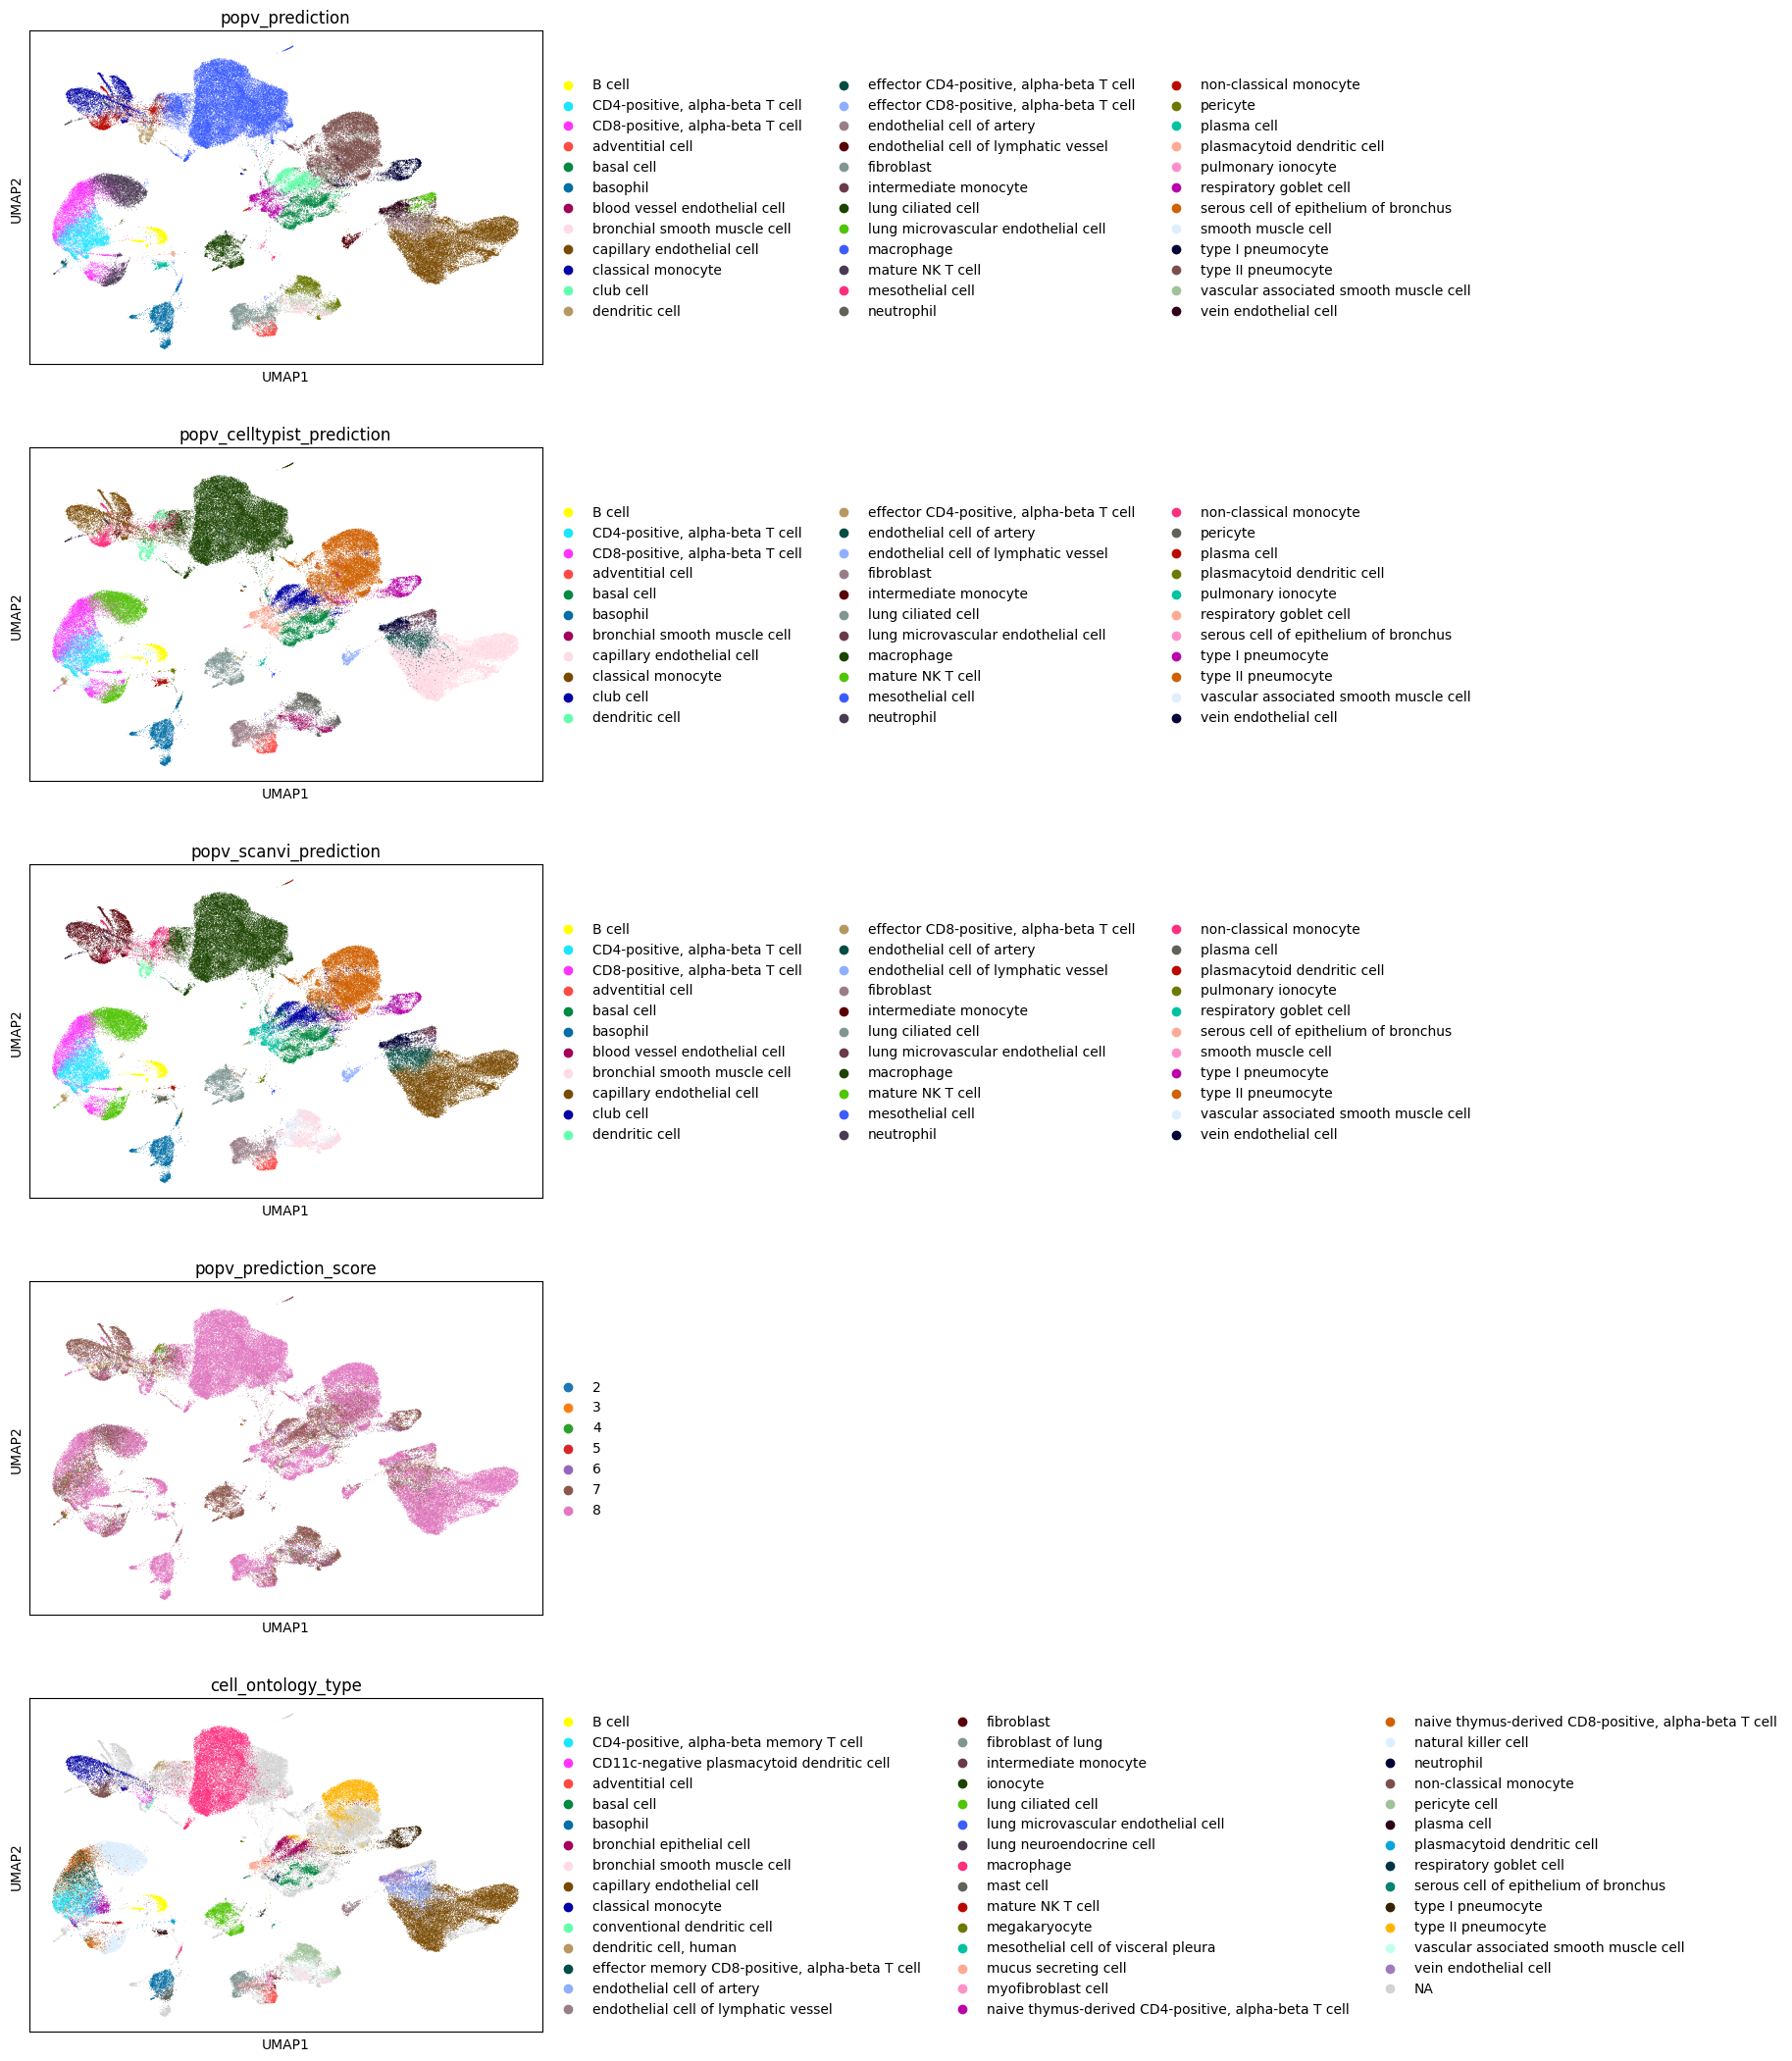

In [19]:
# Optional: save the full anndata will all objects
# adata.write(f'{output_folder}/query_and_reference_popv.h5ad')

adata.obsm["X_umap"] = adata.obsm["X_scvi_umap_popv"]

sc.pl.umap(
    adata,
    color=[
        "popv_prediction",
        "popv_celltypist_prediction",
        "popv_scanvi_prediction",
        "popv_prediction_score",
        "cell_ontology_type",
    ],
    ncols=1,
)

# Step 6: Summary Statistics

Making confusion matrix for popv_celltypist_prediction


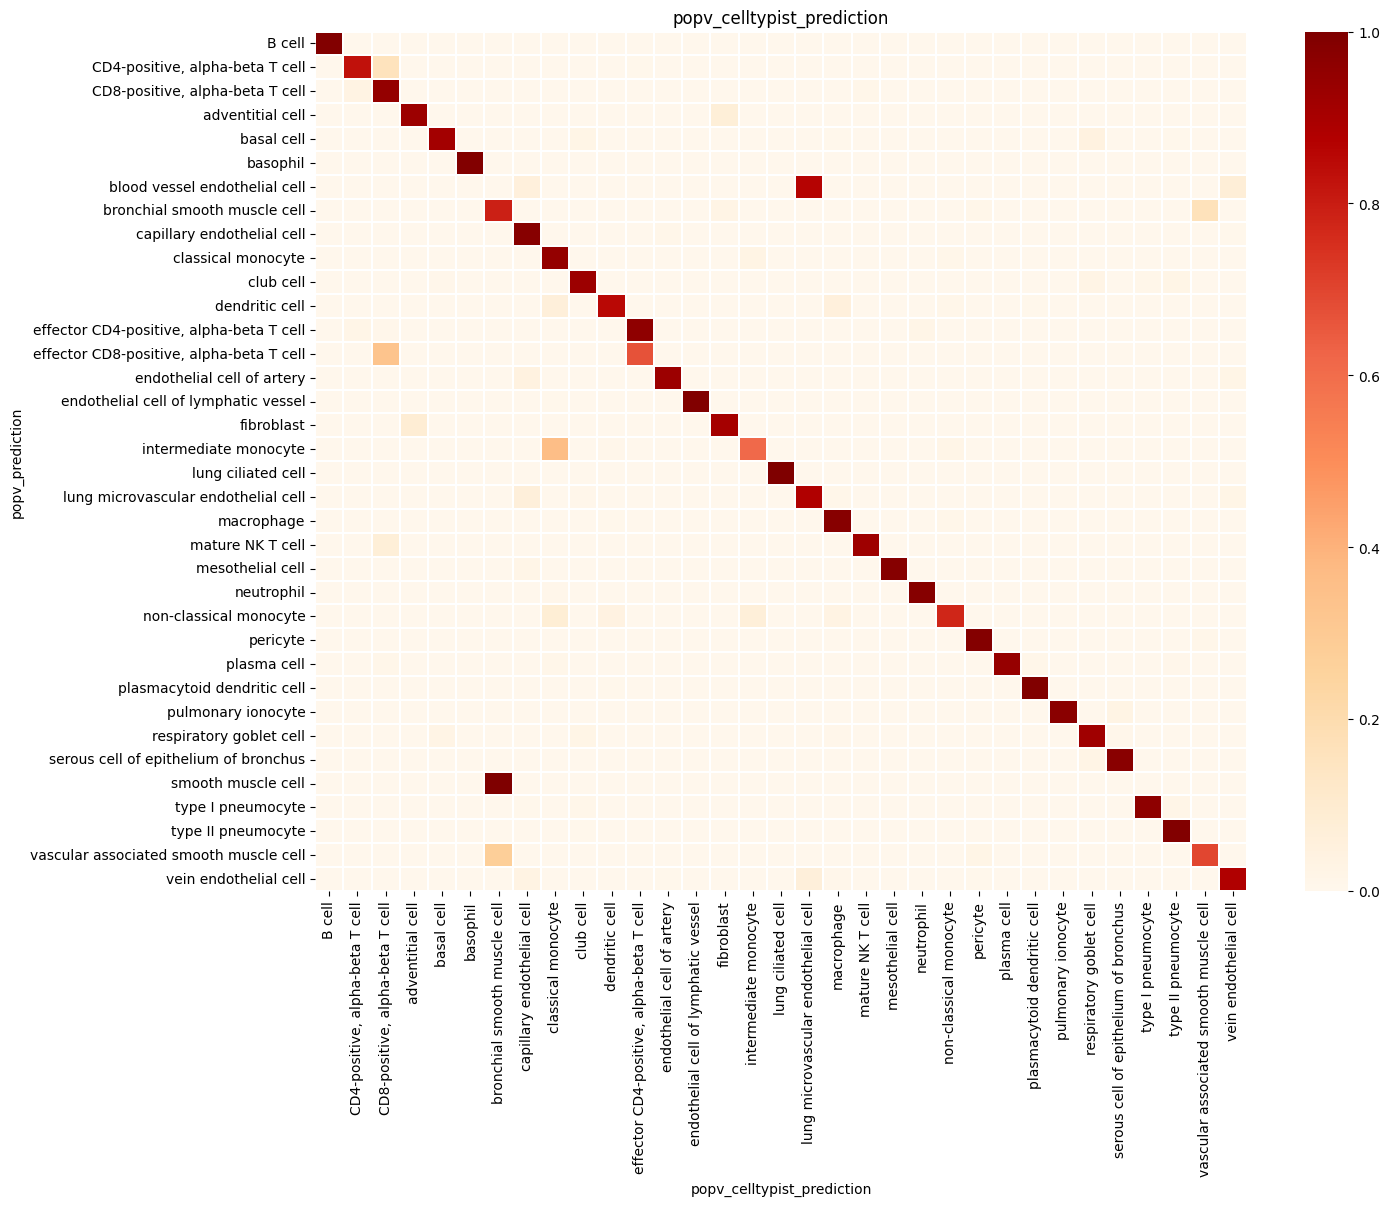

Making confusion matrix for popv_knn_on_bbknn_prediction


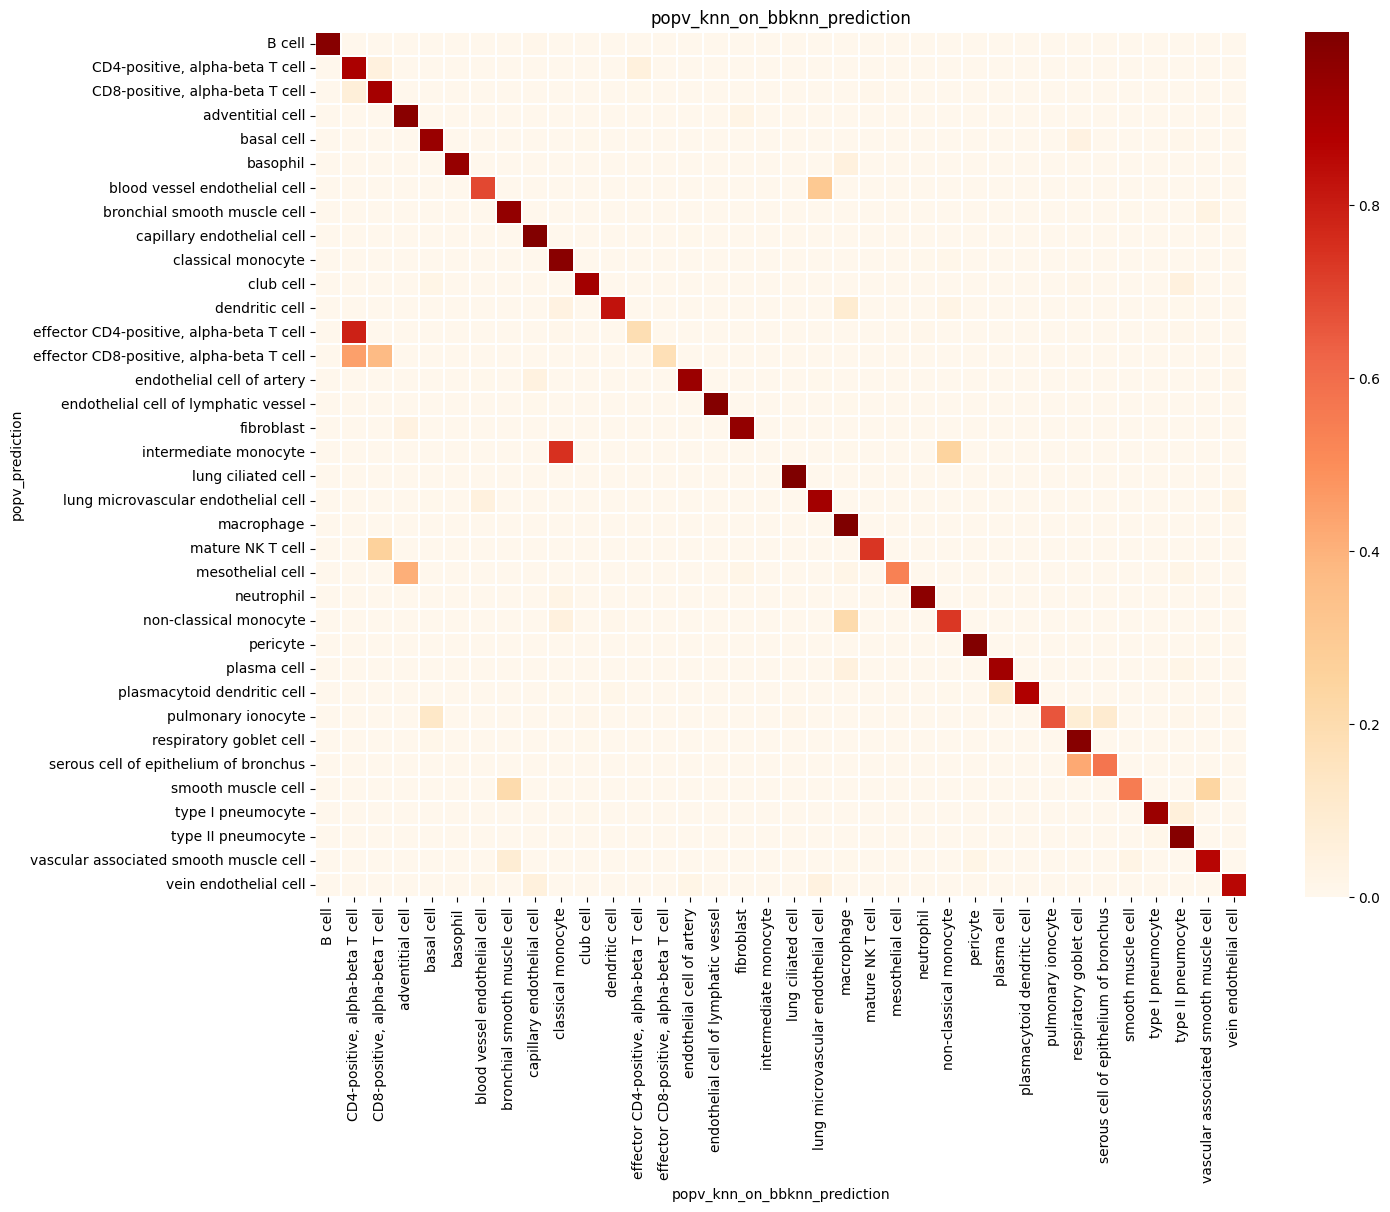

Making confusion matrix for popv_knn_on_scanorama_prediction


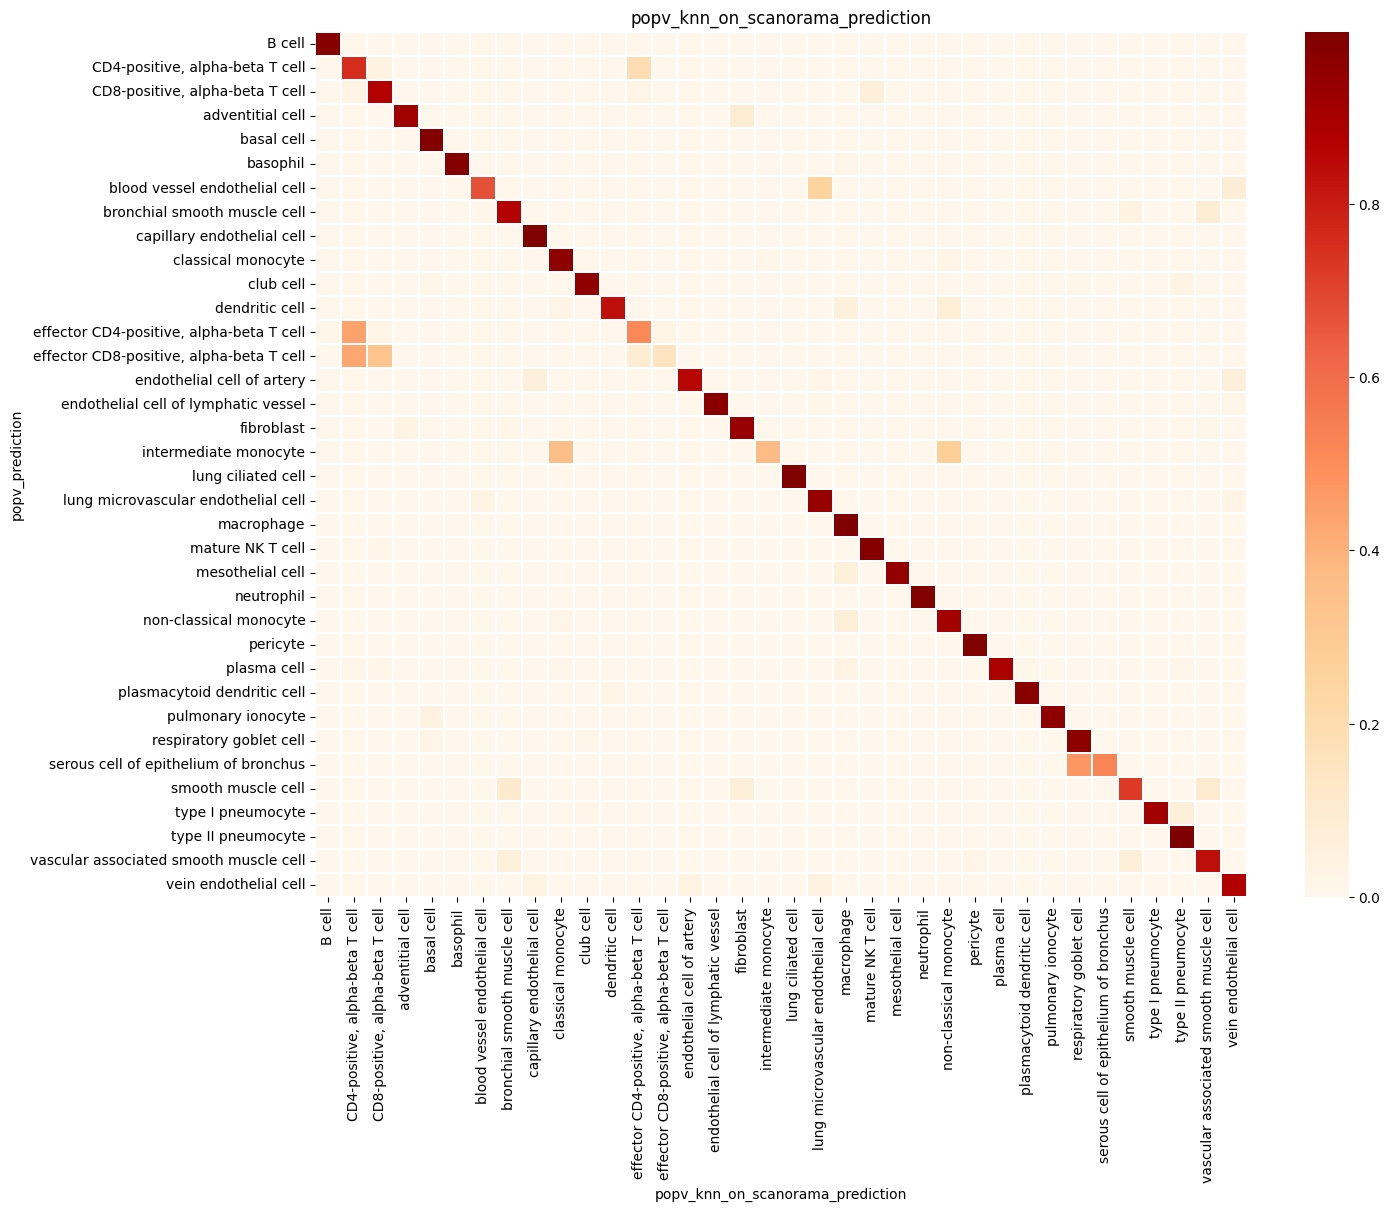

Making confusion matrix for popv_knn_on_scvi_prediction


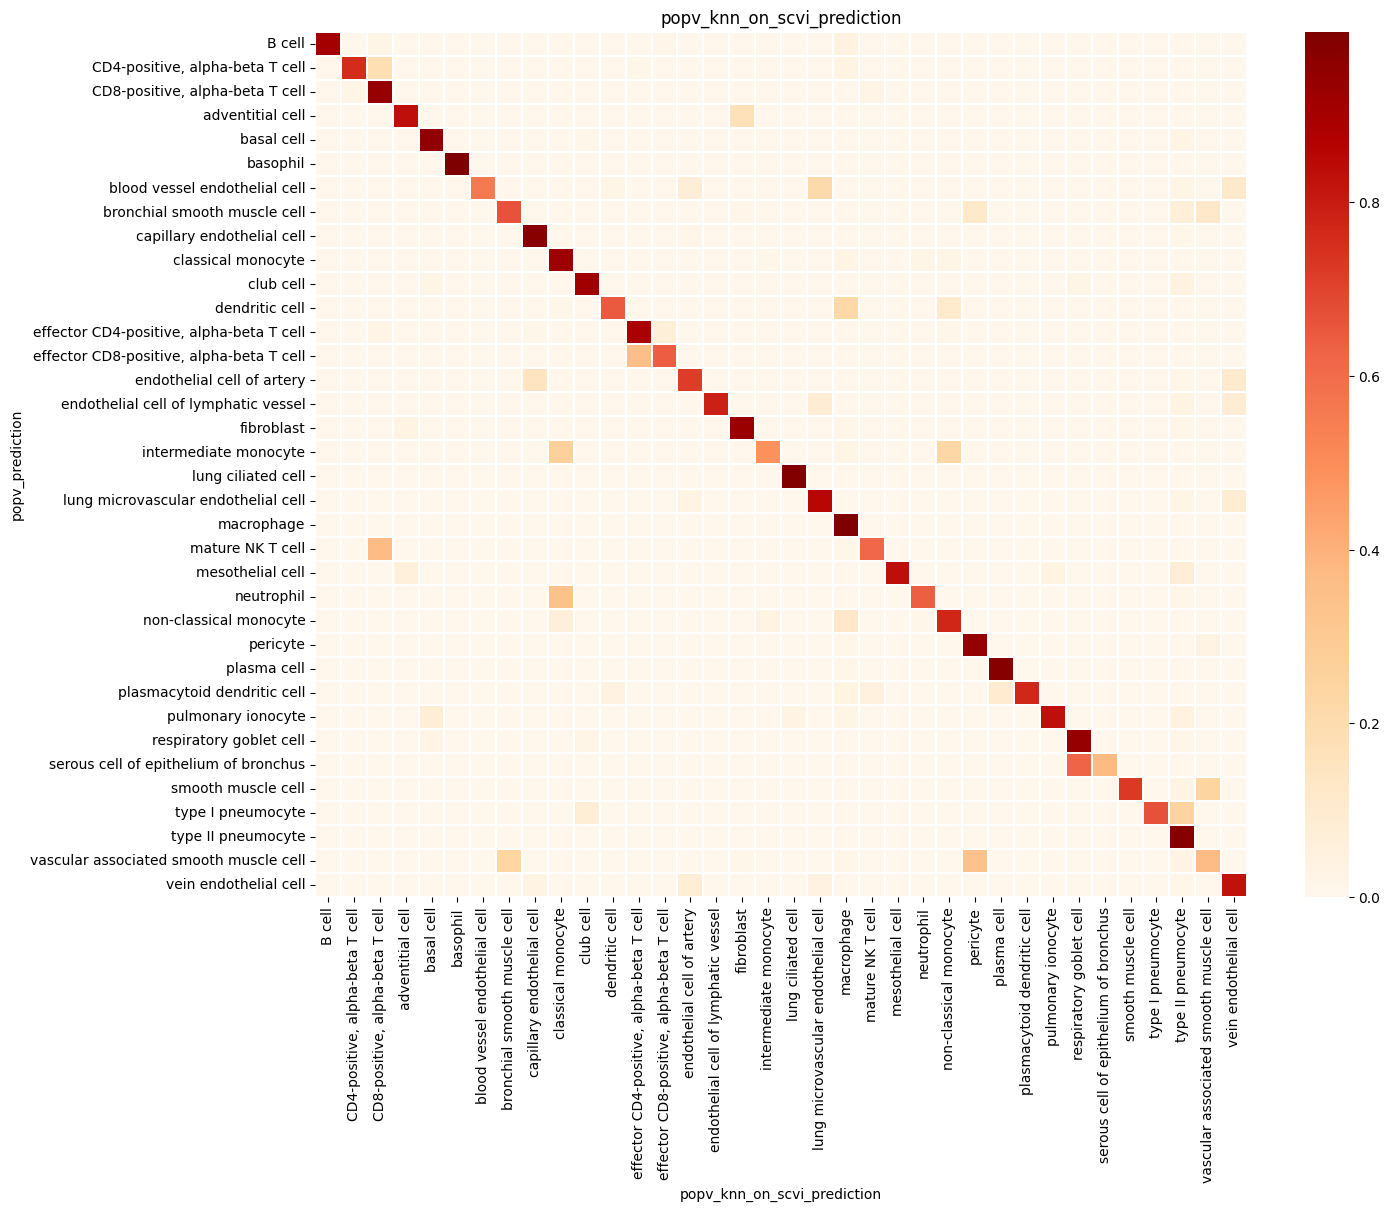

Making confusion matrix for popv_onclass_prediction


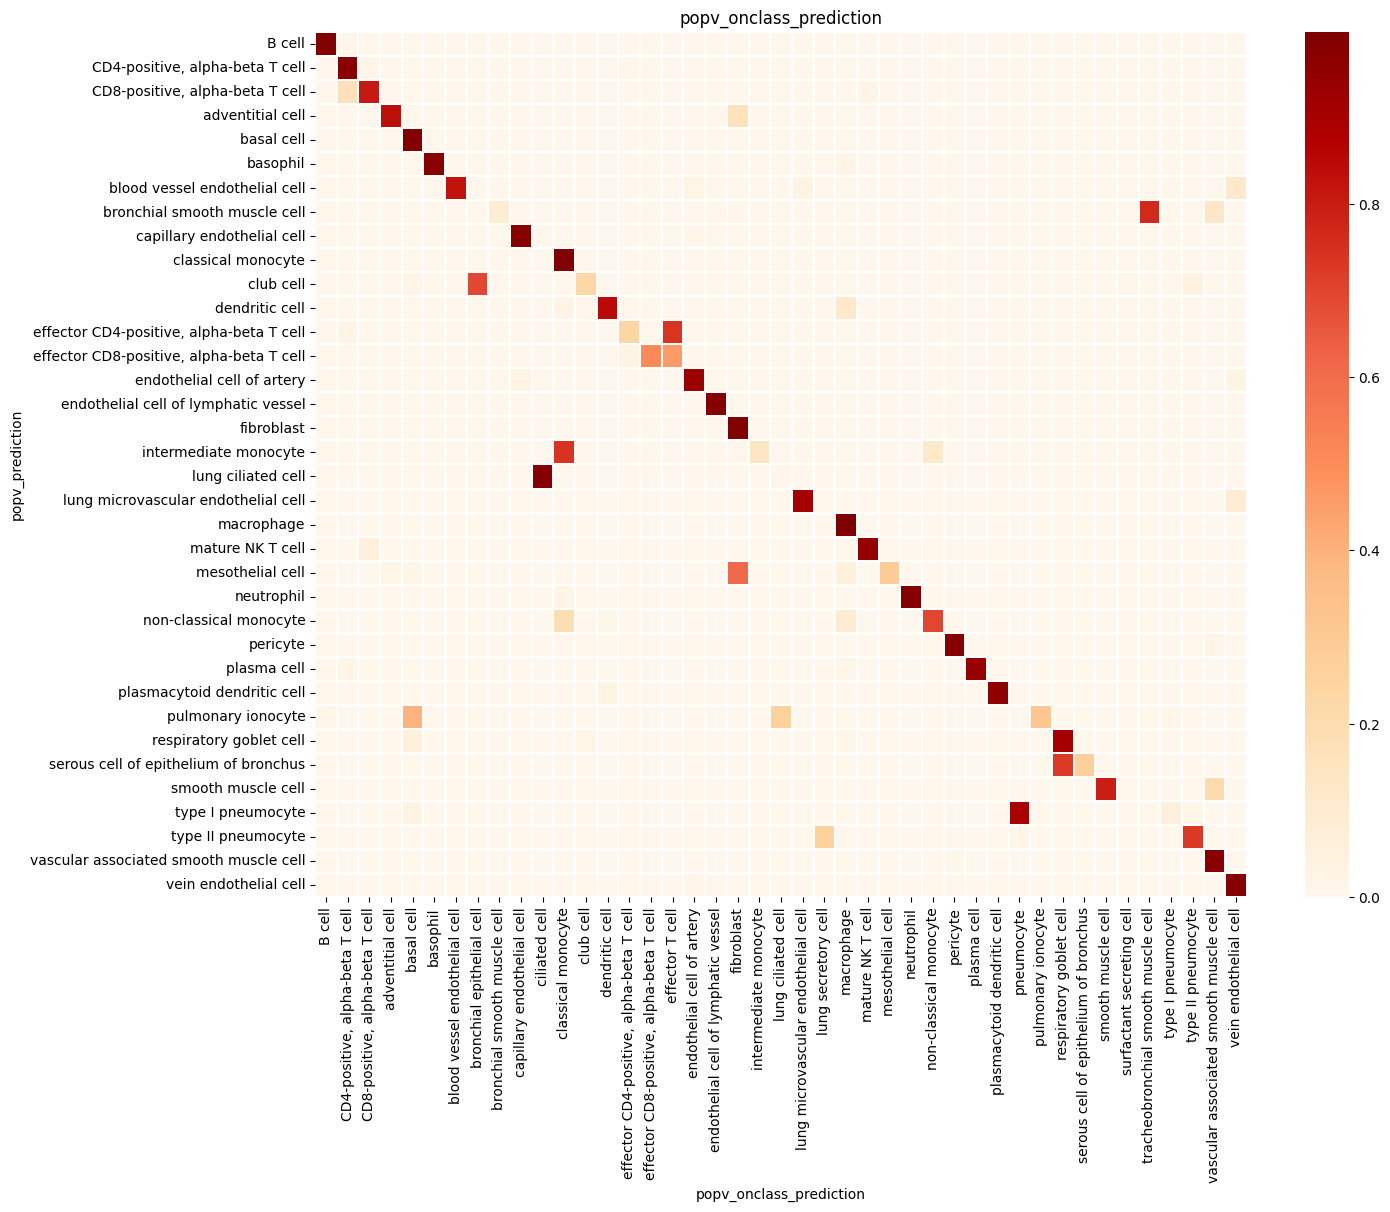

Making confusion matrix for popv_rf_prediction


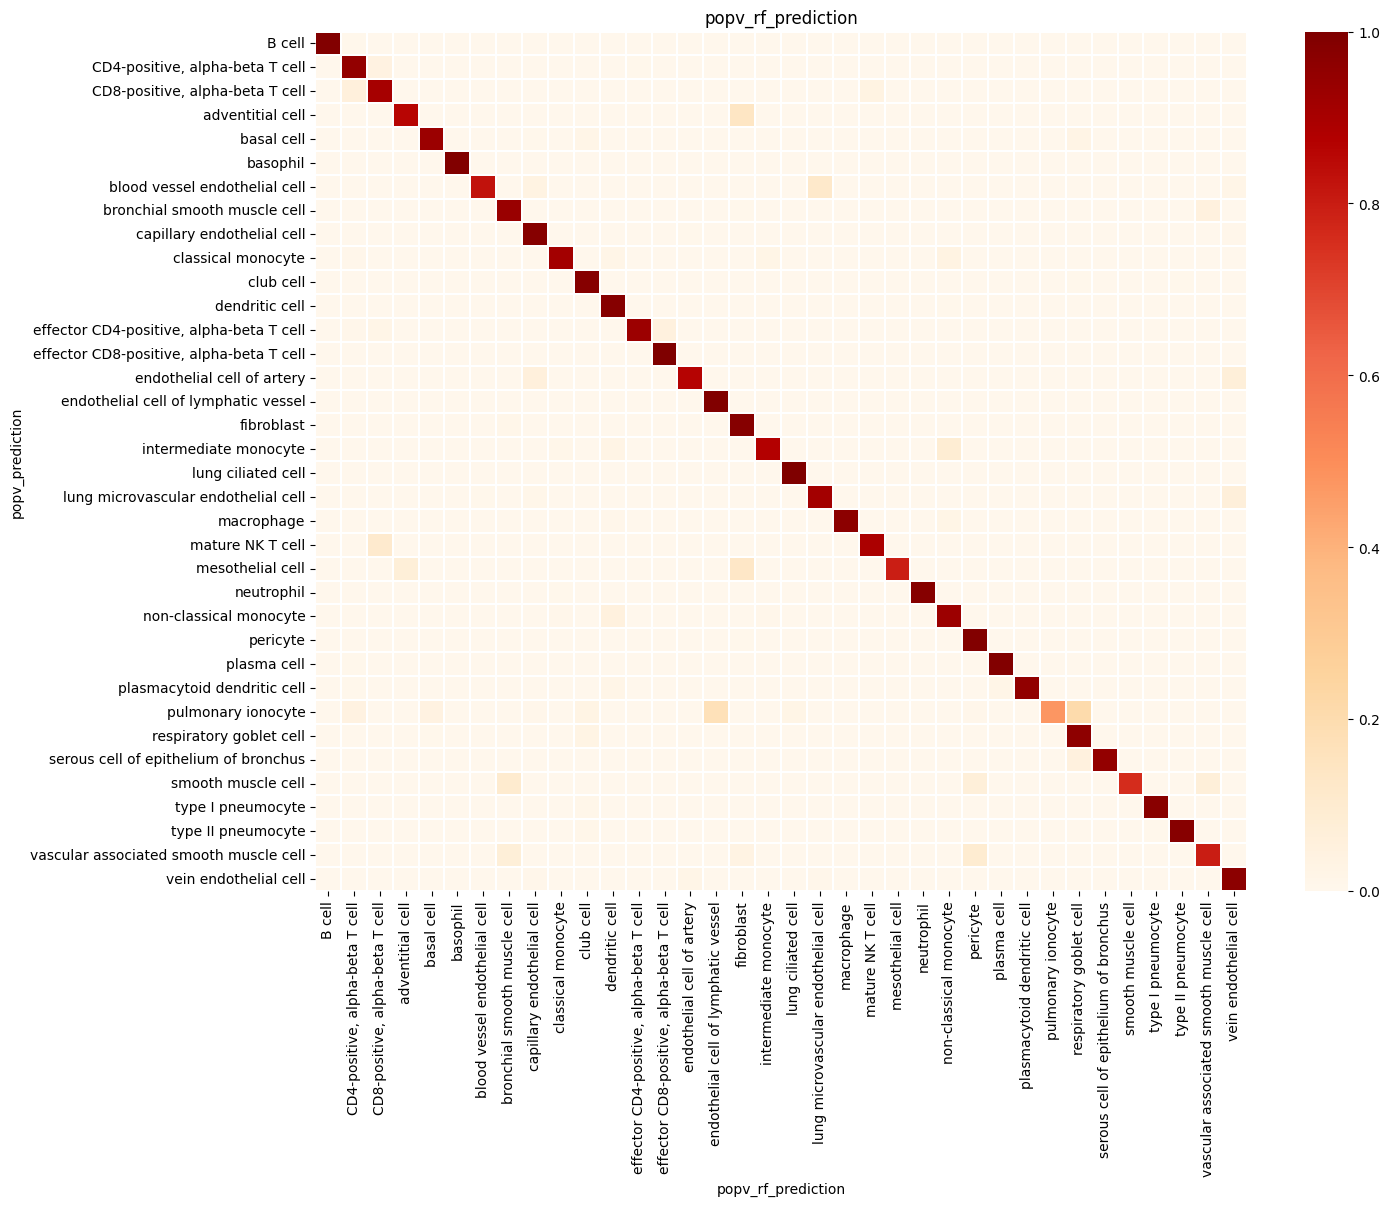

Making confusion matrix for popv_scanvi_prediction


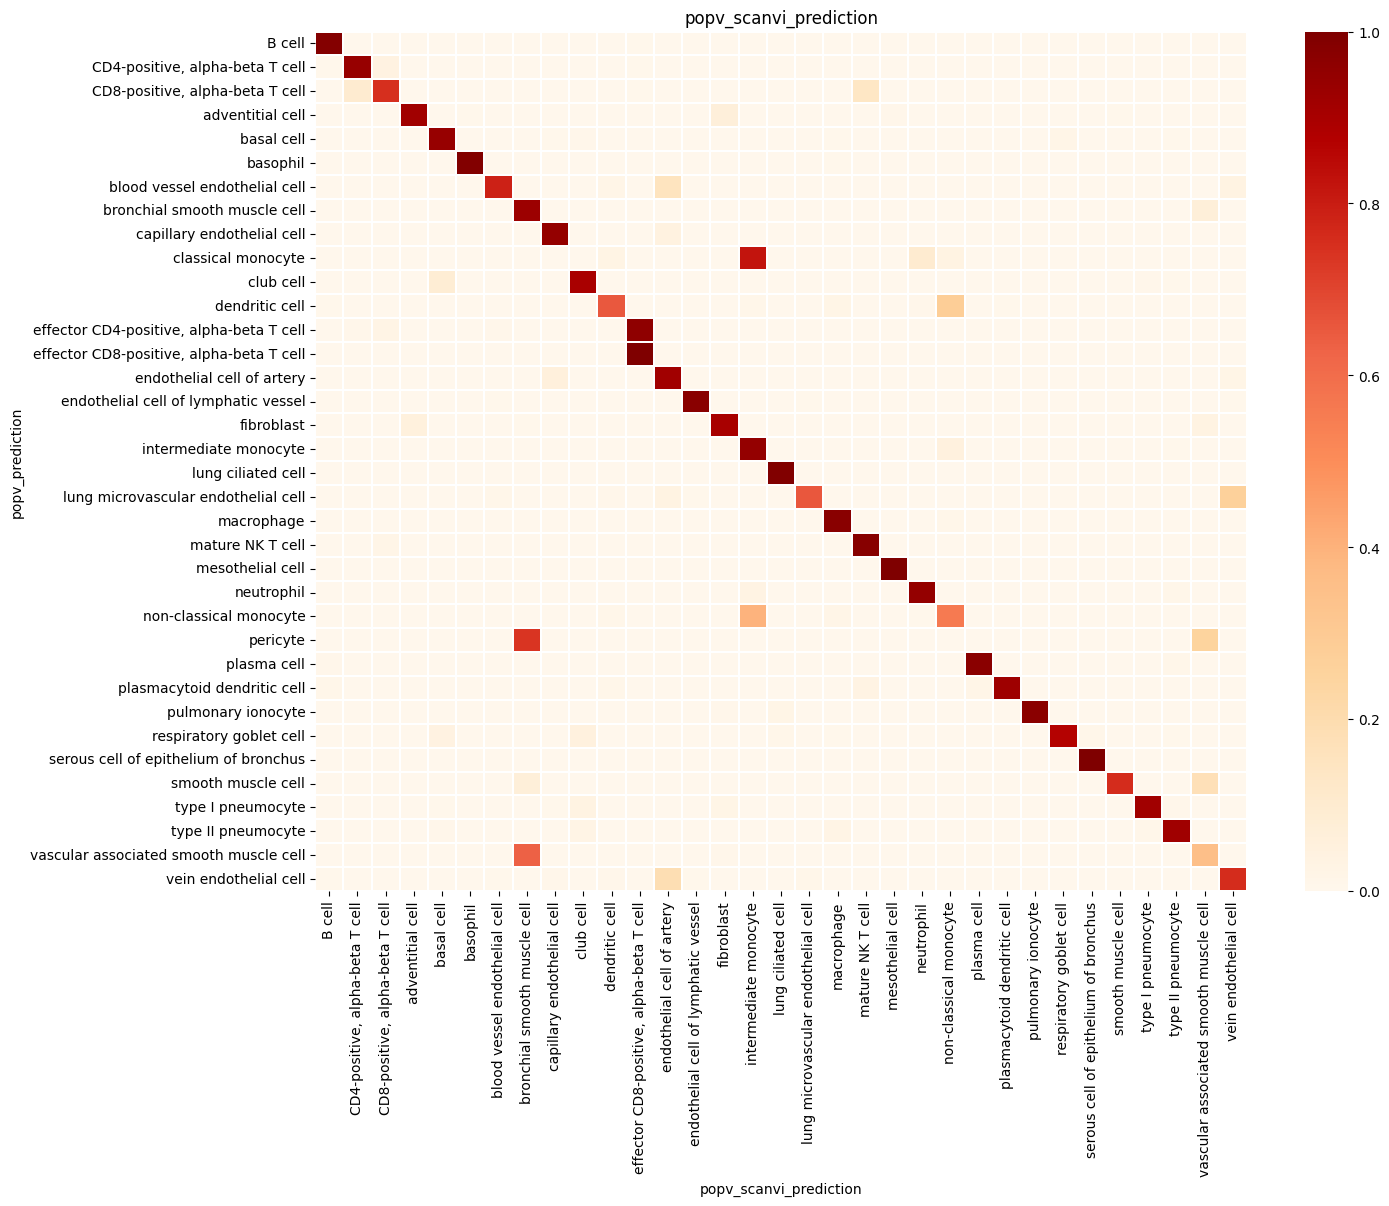

Making confusion matrix for popv_svm_prediction


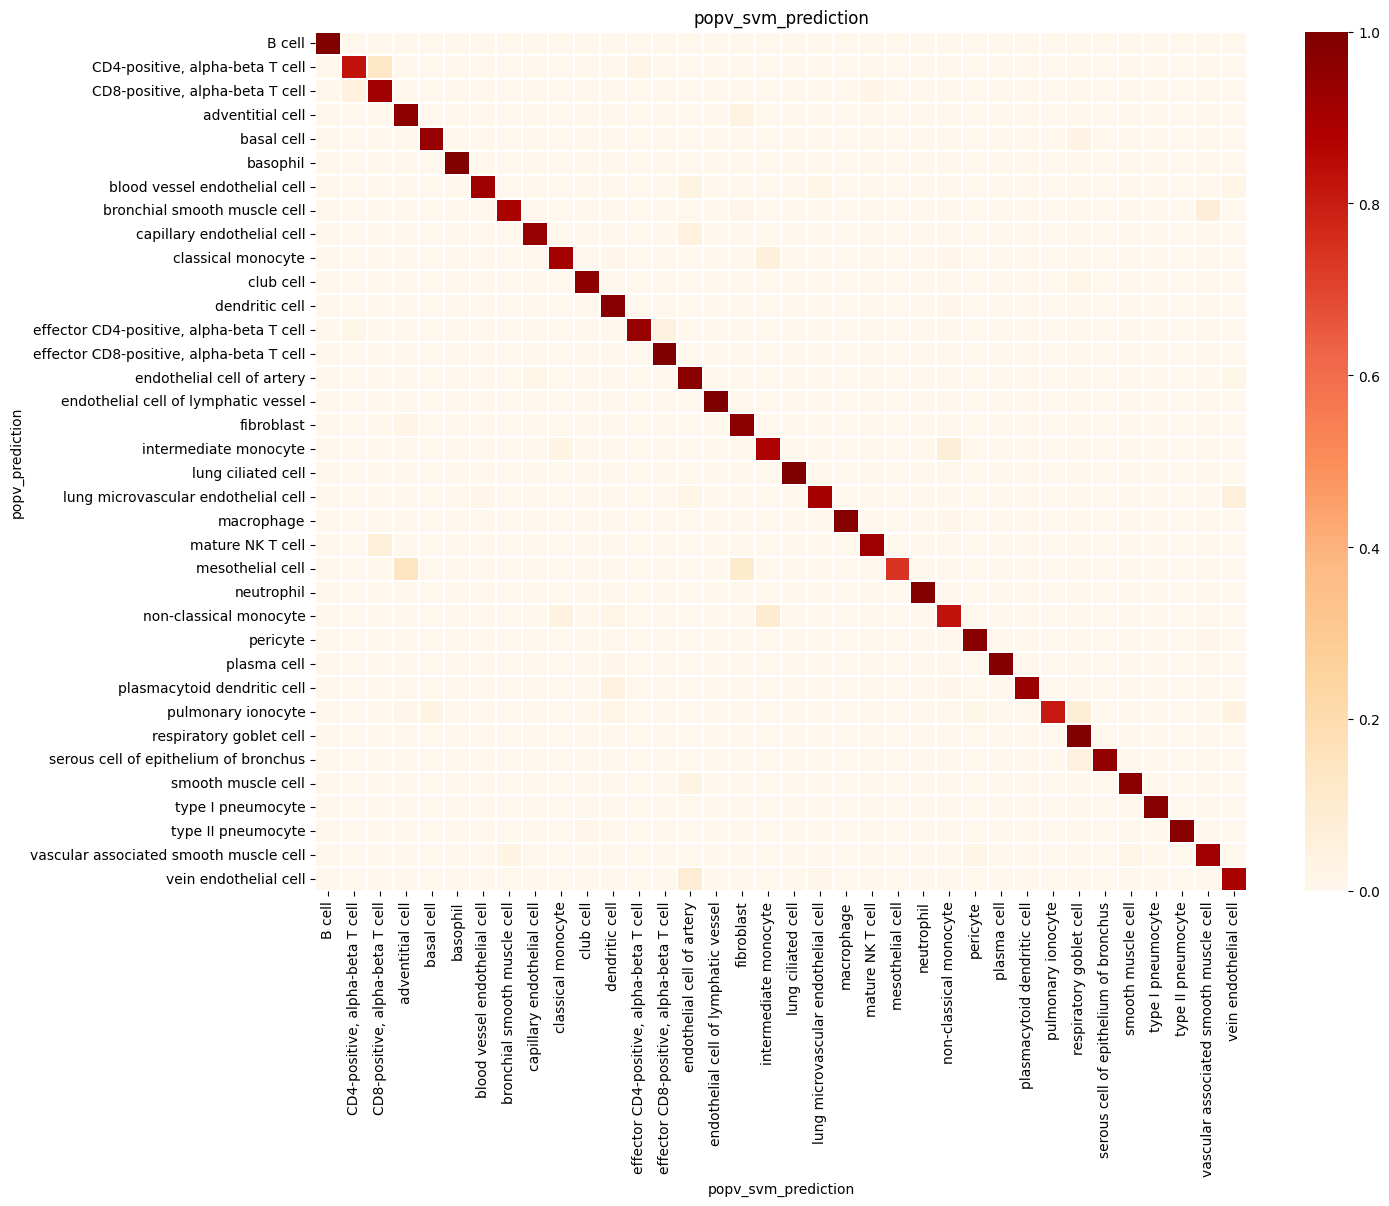

Making confusion matrix for onclass_seen


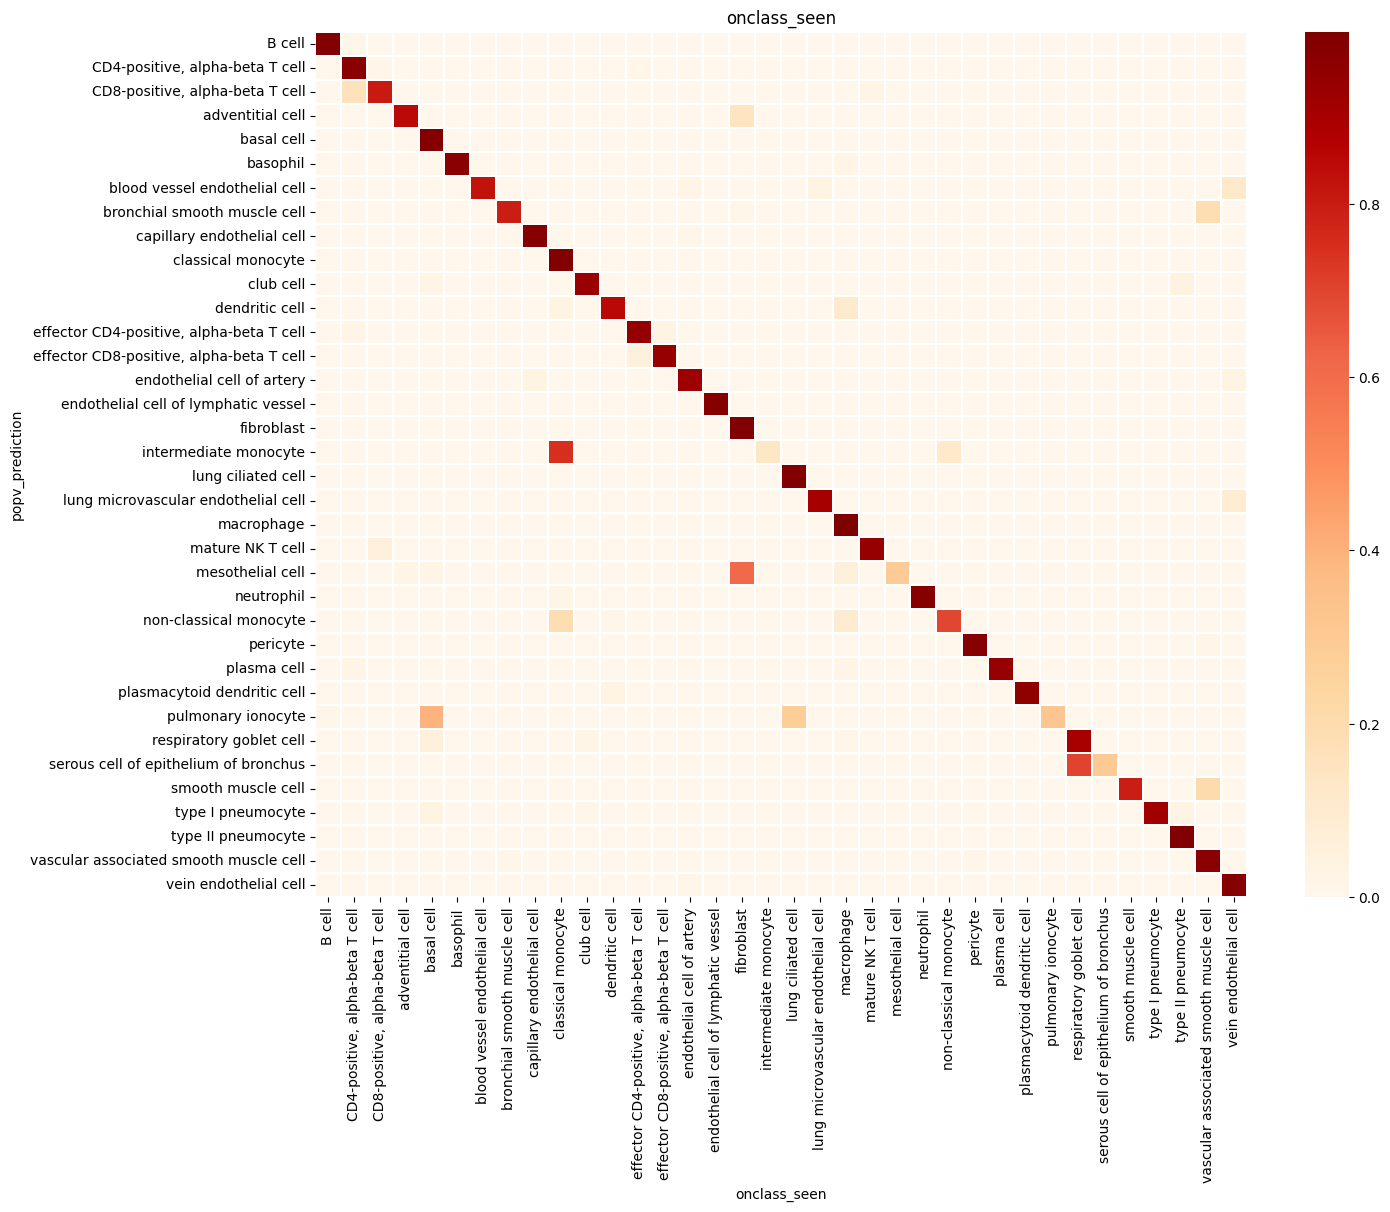

In [20]:
popv.visualization.make_agreement_plots(
    adata,
    prediction_keys=adata.uns["prediction_keys"] + ["onclass_seen"],
    save_folder=output_folder,
)

Visualise the prediction results.

<Axes: title={'center': 'PopV Prediction Score'}, xlabel='Score', ylabel='Frequency'>

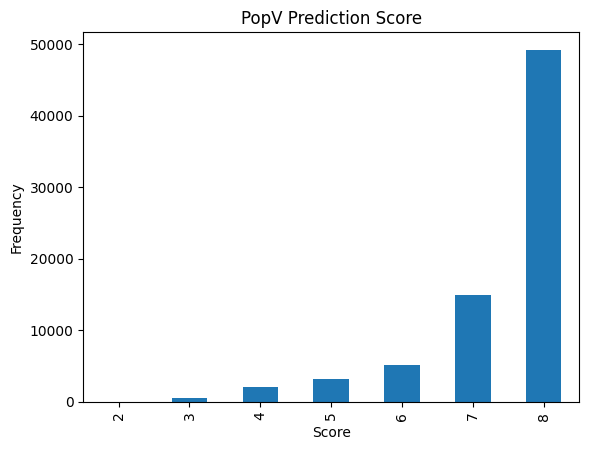

In [21]:
popv.visualization.prediction_score_bar_plot(
    adata, popv_prediction_score="popv_prediction_score"
)

<Axes: ylabel='Mean Agreement'>

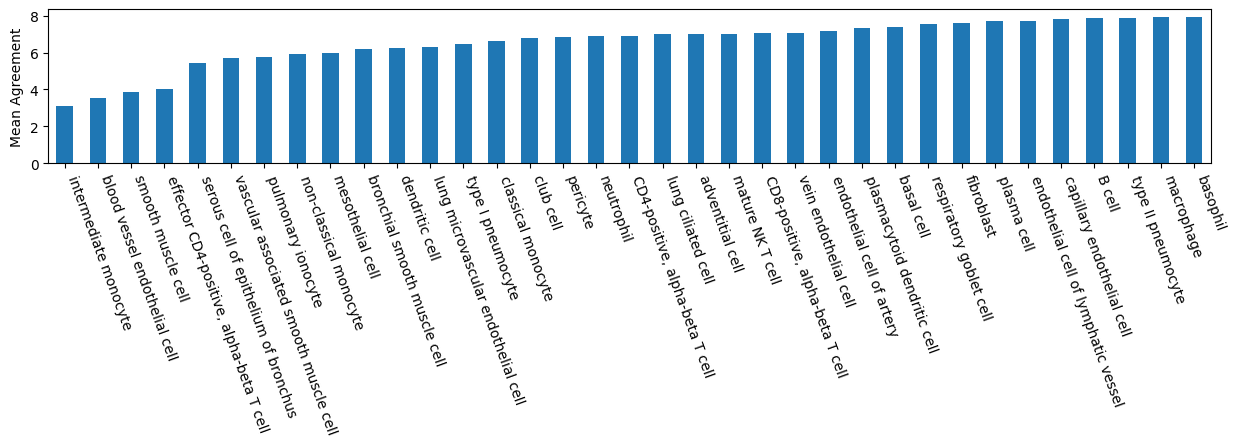

In [22]:
popv.visualization.agreement_score_bar_plot(adata)

Cell type proportion plot

<Axes: ylabel='log Celltype Abundance'>

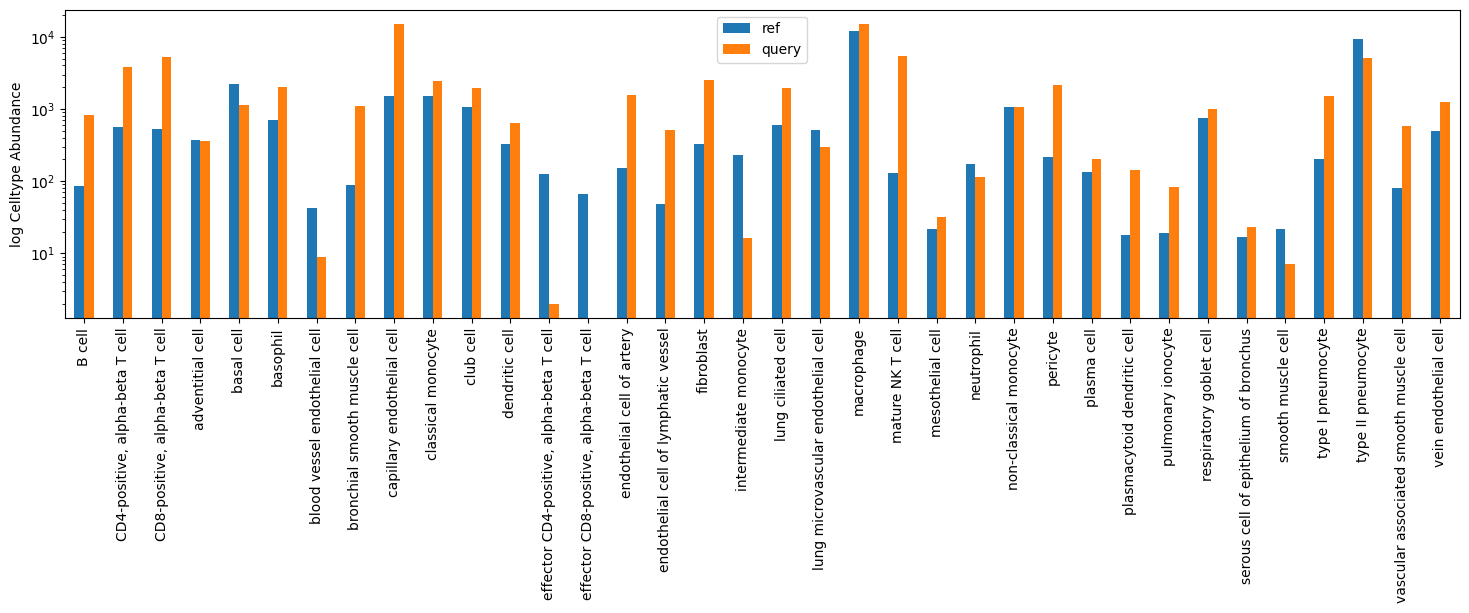

In [23]:
popv.visualization.celltype_ratio_bar_plot(adata)

# `NSForest` on top of `CellTypist.majorityVote` predictions

Testing to see if NSForest can identify top genes per cell-type-cluster derived from CellTypist predictions.

First clone the repo.

In [ ]:
!git clone https://github.com/JCVenterInstitute/NSForest.git

## Instructions to use NS-Forest v3.0 (more docs on [repo](https://github.com/JCVenterInstitute/NSForest)):

```python
from NSForest_v3 import *
import itertools

adata_markers = NS_Forest(adata) #Runs NS_Forest on scanpy object
Markers = list(itertools.chain.from_iterable(adata_markers['NSForest_Markers'])) #gets list of minimal markers from dataframe for display in scanpy plotting functions
Binary_Markers = list(itertools.chain.from_iterable(adata_markers['Binary_Genes'])) #gets list of binary markers from dataframe for display in scanpy plotting functions
```

NS-Forest v3.0 parameters
```python
NS_Forest(adata, clusterLabelcolumnHeader = "louvain", rfTrees = 1000, Median_Expression_Level = 0, Genes_to_testing = 6, betaValue = 0.5)

adata = scanpy object
rfTrees = Number of trees
clusterLabelcolumnHeader = column header in adata.obs['header_here!'] where cluster assignments reside. Typically 'louvain' if louvain clustering was used.
Median_Expression_Level = median expression level for removing negative markers
Genes_to_testing = How many ranked genes by binary score will be evaluated in permutations by fbeta-score
betaValue = Set values for fbeta weighting. 1 is default f-measure. close to zero is Precision, greater than 1 weights toward Recall
```

> Facing issue with converting the subset anndata into a dataframe in the source-code of the main NS_Forest() function itself:

```python
for clust in ClusterList: #adata.obs.Clusters.cat.categories:    
    subset_adata = adata[adata.obs[clusterLabelcolumnHeader].isin([clust]),:]
    Subset_dataframe = pd.DataFrame(data = subset_adata.X, index = subset_adata.obs, columns = subset_adata.var_names)
    medianValues.loc[clust] = Subset_dataframe.median()
```

Gonna try and use `pd.DataFrame.sparse.from_spmatrix()` to correctly parse the subset anndata. Ask Renee and raise pull-request accordingly.

# NS_FOREST SOURCE CODE

# Spent a lot of time trying to debug the old NSForest-code:
```python
def NS_Forest(adata, clusterLabelcolumnHeader = "louvain", rfTrees = 1000, Median_Expression_Level = 0, Genes_to_testing = 6, betaValue = 0.5):
    #adata = scanpy object
    #rfTrees = Number of trees
    #Median_Expression_Level = median expression level for removing negative markers
    #Genes_to_testing = How many top genes ranked by binary score will be evaluated in permutations by fbeta-score (as the number increases the number of permutation rises exponentially!)
    #betaValue = Set values for fbeta weighting. 1 is default f-measure. close to zero is Precision, greater than 1 weights toward Recall

    #libraries
    import numpy as np
    import pandas as pd
    import numexpr
    import itertools
    from subprocess import call
    import scanpy as sc
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import graphviz
    import time
    
    # Functions
    def randomForest(adata,dataDummy,column,rfTrees,threads): #Runs Random forest on the binary dummy variables; outputs all genes ranked Gini Index
        x_train = adata.X
        names = adata.var_names
        y_train = dataDummy[column]
        rf = RandomForestClassifier(n_estimators=rfTrees, n_jobs=threads, random_state=123456)
        rf.fit(x_train, y_train)
        Ranked_Features = sorted(zip([round(x, 8) for x in rf.feature_importances_], names),reverse=True)
        return Ranked_Features    
        
    def rankInformative(Ranked_Features,column,rankedDict,howManyInformativeGenes2test): #subsets list according to howManyInformativeGenes2test parameter
        RankedList = []
        midcounter = 0
        for x in Ranked_Features:
            midcounter +=1
            RankedList.append(x[1])
            if midcounter==howManyInformativeGenes2test:
                break
        rankedDict[column] = RankedList
        return RankedList             

    def negativeOut(x, column,medianValues,Median_Expression_Level): # Removes genes with median expression < Median_Expression_Level parameter
        Positive_RankedList_Complete = []
        for i in x:
            if medianValues.loc[column, i] > Median_Expression_Level:
                print(i)
                print(medianValues.loc[column, i])
                Positive_RankedList_Complete.append(i)
            else:
                print(i)
                print(medianValues.loc[column, i])
                print("Is Right Out!")
        return Positive_RankedList_Complete

    def binaryScore(Positive_RankedList_Complete, InformativeGenes, medianValues, column, clusters2Loop, Ranked_Features, Genes_to_testing, Binary_store_DF):
        # Takes top ranked positive genes (number according to Genes_to_testing) and computes Binary score for each gene
        Positive_RankedList = list(Positive_RankedList_Complete[0:InformativeGenes])
        Median_RF_Subset = medianValues.loc[:, Positive_RankedList]
        Rescaled_Matrix = pd.DataFrame()


        for i in Positive_RankedList:
            Target_value = medianValues.loc[column, i]
            Rescaled_values = Median_RF_Subset[[i]].divide(Target_value)
            Rescaled_Matrix = pd.concat([Rescaled_Matrix,Rescaled_values],axis=1)

        difference_matrix = Rescaled_Matrix.apply(lambda x: 1-x, axis=1)
        difference_matrix_clean1 = difference_matrix.where(difference_matrix >= 0, other=0)
        difference_matrix_clean = difference_matrix_clean1.where(difference_matrix > 0, 0)
        ColumnSums = difference_matrix_clean.sum(0)
        rescaled = ColumnSums/clusters2Loop
       
        # Double sort so that for ties, the RF ranking prevails!
        Ranked_Features_df = pd.DataFrame(Ranked_Features)
        Ranked_Features_df.rename(columns={1: 'Symbol'}, inplace=True)
        Ranked_Features_df_indexed = Ranked_Features_df.set_index("Symbol")
        rescaled_df = pd.DataFrame(rescaled)
        binaryAndinformation_Ranks = rescaled_df.join(Ranked_Features_df_indexed,lsuffix='_scaled', rsuffix='_informationGain')
        binaryAndinformation_Ranks.sort_values(by=['0_scaled','0_informationGain'],ascending= [False, False], inplace = True)

        Binary_ranked_Genes = binaryAndinformation_Ranks.index.tolist()
        Binary_RankedList = list(Binary_ranked_Genes[0:Genes_to_testing])
        Binary_scores = rescaled.to_dict()

        Binary_store_DF = Binary_store_DF.append(binaryAndinformation_Ranks)
        
        return Binary_RankedList,Binary_store_DF



    def DT_cutOffs(x, column, dataDummy): # For each gene in the top binary gene, function finds optimal decision tree cutoff for F-beta testing
        cut_dict = {}
        for i in x:
            filename = str(i)
            y_train = dataDummy[column]
            x_train = adata[:,i].X
            
            # VIKRANT-CHANGES:  Following line fails because input anndata has sparse-matrix with 0'th index columns
            #                   However, next line's 'X' object not used anywhere afterwards. Unnecessary fix.
            # X = x_train[:, None]
            # X = x_train[:, 0] if isinstance(x_train, anndata._core.views.SparseCSRView) else x_train[:, None]

            clf = tree.DecisionTreeClassifier(max_leaf_nodes=2)
            clf = clf.fit(x_train, y_train) 
            threshold = clf.tree_.threshold
            cut_dict[i] = threshold[0]
        return cut_dict



    def queryGenerator(Binary_RankedList, cut_dict): # Builds dict to create queries for F-beta testing
        queryList = []
        for i in Binary_RankedList:
            str1 = i
            current_value = cut_dict.get(str1)
            queryString1 = str(str1.replace("-", "_").replace(".", "_"))+'>='+ str(current_value)
            queryList.append(queryString1)
        return queryList

    def permutor(x): # creates all combinations of queries built above
        binarylist2 = x
        combs = []
        for i in range(1, len(x)+1):
            els = [list(x) for x in itertools.combinations(binarylist2, i)]
            combs.extend(els)
        return combs

    def fbetaTest(x, column, adata, Binary_RankedList, testArray, betaValue): # uses queries to perform F-beta testing at the betaValue set in parameters
        fbeta_dict = {}
        subset_adata = adata[:,Binary_RankedList]
        print(f'subset_adata={subset_adata}')
        
        # VIKRANT-CHANGES:  Adding in extra try-catch blocks.
        #                   Subset dataframe should be created from sparse matrix.
        # Subset_dataframe = pd.DataFrame(data = subset_adata.X, index = subset_adata.obs_names, columns = subset_adata.var_names)
        try:
          Subset_dataframe = pd.DataFrame(data = subset_adata.X, index = subset_adata.obs_names, columns = subset_adata.var_names)
        except Exception as e:
          print(f'Failed HERE! {e}')

        # VIKRANT-CHANGES:  Adding in extra try-catch blocks with sparse-matrix processing. Succeeds now.
        #                   Subset dataframe should be created from sparse matrix.
        try:
          Subset_dataframe = pd.DataFrame.sparse.from_spmatrix(
            data=subset_adata.X, 
            index=subset_adata.obs[clusterLabelcolumnHeader],
            columns=subset_adata.var_names
          )
        except Exception as e:
          print(f'AGAIN FAILED HERE {e}')

        Subset_dataframe.columns = Subset_dataframe.columns.str.replace("-", "_").str.replace(".", "_")
        print(f'Subset_dataframe.columns = {Subset_dataframe.columns}')

        for list in x:
            testArray['y_pred'] = 0
            betaQuery = '&'.join(list)            
            Ineq1 = Subset_dataframe.query(betaQuery)
            # print(f'Ineq1 = {Ineq1}')
            
            # VIKRANT-CHANGES:  Commenting out the following line to reset_index() and then use that index_list
            #                   No fix found yet.
            # testList = Ineq1.index.tolist()
            print(f'len(Ineq1.index.tolist())={len(Ineq1.index.tolist())} , Ineq1.index.tolist()={Ineq1.index.tolist()}')
            testList = Ineq1.reset_index().index.tolist()
            print(f'len(testList)={len(testList)}, testList={testList}')

            print(f'testList={testList}')
            print(f'testArray={testArray}')
            testArray.loc[testList, 'y_pred'] = 1
            f1 = fbeta_score(testArray['y_true'], testArray['y_pred'], average= 'binary', beta=betaValue)
            print(f'f1 = {f1}')
            tn, fp, fn, tp = confusion_matrix(testArray['y_true'], testArray['y_pred']).ravel()
            ### strip betaQuery and normalize        
            dictName = column+"&"+betaQuery.replace("_", "-")
            print(f'dictName={dictName}')
            fbeta_dict[dictName] = f1, tn, fp, fn, tp
            print(f'fbeta_dict[dictName]={fbeta_dict[dictName]}')
        print(fbeta_dict)

        return fbeta_dict
    
    def ReportReturn(max_grouped_df):  # Cleaning up results to return as dataframe
        for column in max_grouped_df.columns[8:14]:
            max_grouped_df[column] = max_grouped_df[column].str.replace('nan', '')
        max_grouped_df["NSForest_Markers"] = max_grouped_df[max_grouped_df.columns[8:14]].values.tolist()
        max_grouped_df = max_grouped_df[['clusterName',"f-measure",'markerCount','NSForest_Markers','True Positive','True Negative','False Positive','False Negative',1,2,3,4,5,6,"index"]]
        
        for i in max_grouped_df.index:
            cleanList = [string for string in max_grouped_df.loc[i,'NSForest_Markers'] if string != ""]
            max_grouped_df.at[i, 'NSForest_Markers'] = cleanList
        Results = max_grouped_df
        return Results
  
  
    #Parameters of interest
    
    #Random Forest parameters
    threads = -1   #Number of threads to use, -1 is the greedy option where it will take all available CPUs/RAM

    #Filtering and ranking of genes from random forest parameters
    howManyInformativeGenes2test = 15 #How many genes from the GiniRanking move on for further testing...
    
    #How many top genes from the Random Forest ranked features will be evaluated for binariness 
    InformativeGenes = 10 
    
    #Main function# 
    
    #Creates dummy columns for one vs all Random Forest modeling
    dataDummy = pd.get_dummies(adata.obs[clusterLabelcolumnHeader], columns=[clusterLabelcolumnHeader], prefix = "", prefix_sep = "")
    
    #Creates matrix of cluster median expression values
    medianValues = pd.DataFrame(columns=adata.var_names, index=adata.obs[clusterLabelcolumnHeader].cat.categories)                                                                                                 
    
    ClusterList = adata.obs[clusterLabelcolumnHeader].unique()

    # VIKRANT-CHANGES:  Commenting out the following lines since I've tested my working solution
    #                   Subset dataframe input is a sparse scipy-matrix but code can handle only dataframe
    # for clust in ClusterList: #adata.obs.Clusters.cat.categories:    
    #     subset_adata = adata[adata.obs[clusterLabelcolumnHeader].isin([clust]),:]
    #     Subset_dataframe = pd.DataFrame(data = subset_adata.X, index = subset_adata.obs, columns = subset_adata.var_names)
    #     medianValues.loc[clust] = Subset_dataframe.median()
    for clust in ClusterList:
      subset_adata = adata[adata.obs[clusterLabelcolumnHeader].isin([clust]),:]
      Subset_dataframe = pd.DataFrame.sparse.from_spmatrix(
          data=subset_adata.X, 
          index=subset_adata.obs[clusterLabelcolumnHeader],
          columns=subset_adata.var_names
      )
      medianValues.loc[clust,:] = np.median(Subset_dataframe.to_numpy(), axis=0)
    
    medianValues.to_csv('NSForest3_medianValues.csv')

    ##Use Mean
    #for clust in adata.obs.Clusters.cat.categories:
        #medianValues.loc[clust] = adata[adata.obs[clusterLabelcolumnHeader].isin([clust]),:].X.mean(0)
    
    clusters2Loop = len(dataDummy.columns)-1 
    print(clusters2Loop)
    #gives us the top ten features from RF
    rankedDict = {}
    f1_store_1D = {}
    Binary_score_store_DF = pd.DataFrame()
    DT_cutoffs_store = {}
    
    for column in dataDummy.columns:
        print(column)
        Binary_store_DF = pd.DataFrame()
        
        #Run Random Forest and get a ranked list
        Ranked_Features = randomForest(adata, dataDummy, column, rfTrees, threads)
        RankedList = rankInformative(Ranked_Features,column,rankedDict,howManyInformativeGenes2test)
        
        #Setup testArray for f-beta evaluation
        testArray = dataDummy[[column]]
        testArray.columns = ['y_true']
        
        #Rerank according to expression level and binary score
        Positive_RankedList_Complete = negativeOut(RankedList, column, medianValues, Median_Expression_Level)
        
        outputlist = binaryScore(Positive_RankedList_Complete, InformativeGenes, medianValues, column, clusters2Loop, Ranked_Features, Genes_to_testing, Binary_store_DF)
        Binary_RankedList = outputlist[0]
        Binary_score_store_DF_extra = outputlist[1].assign(clusterName = column)         
        Binary_score_store_DF = Binary_score_store_DF.append(Binary_score_store_DF_extra)
        
        # VIKRANT CHANGES:  Code had unnecessary error in this function.
        #Get expression cutoffs for f-beta testing
        cut_dict = DT_cutOffs(Binary_RankedList, column, dataDummy)
        DT_cutoffs_store[column] = cut_dict
        
        #Generate expression queries and run those queries using fscore() function
        queryInequalities = queryGenerator(Binary_RankedList, cut_dict)
        print(f'queryInequalities={queryInequalities}')
        FullpermutationList = permutor(queryInequalities)
        print(f'FullpermutationList = {FullpermutationList}')
        f1_store = fbetaTest(FullpermutationList, column, adata, Binary_RankedList, testArray, betaValue)
        print(f'f1_store = {f1_store}')
        f1_store_1D.update(f1_store)
        print(f'f1_store = {f1_store}')
        
        
    #Report generation and cleanup for file writeouts 
    f1_store_1D_df = pd.DataFrame() #F1 store gives all results.
    f1_store_1D_df = pd.DataFrame.from_dict(f1_store_1D)
    print(f'f1_store_1D_df = {f1_store_1D_df}')
    Results_df = f1_store_1D_df.transpose()
    Results_df.columns = ["f-measure", "True Negative", "False Positive", "False Negative", "True Positive"]
    Results_df['markerCount'] = Results_df.index.str.count('&')
    Results_df.reset_index(level=Results_df.index.names, inplace=True)
    Results_df_done= Results_df['index'].apply(lambda x: pd.Series(x.split('&')))
    NSForest_Results_Table=Results_df.join(Results_df_done)
    NSForest_Results_Table_Fin = pd.DataFrame()
    NSForest_Results_Table_Fin = NSForest_Results_Table[NSForest_Results_Table.columns[0:8]]
    
    for i, col in enumerate(NSForest_Results_Table.columns[8:15]):
        splitResults = NSForest_Results_Table[col].astype(str).apply(lambda x: pd.Series(x.split('>='))) 
        firstOnly = splitResults[0]
        Ascolumn = firstOnly.to_frame()
        Ascolumn.columns = [col]
        NSForest_Results_Table_Fin = NSForest_Results_Table_Fin.join(Ascolumn)
    
    NSForest_Results_Table_Fin.rename(columns={0:'clusterName'},inplace=True) #rename columns by position
    NSForest_Results_Table_Fin.sort_values(by=['clusterName','f-measure','markerCount'],ascending= [True, False, True], inplace = True)
    print(NSForest_Results_Table_Fin)
    time.perf_counter()
    
    #Write outs
    Binary_score_store_DF.to_csv('NS-Forest_v3_Extended_Binary_Markers_Supplmental.csv')
    NSForest_Results_Table_Fin.to_csv('NS-Forest_v3_Full_Results.csv')
    
    #Subset of full results 
    max_grouped = NSForest_Results_Table_Fin[NSForest_Results_Table_Fin.groupby("clusterName")["f-measure"].transform('max') == NSForest_Results_Table_Fin['f-measure']]
    max_grouped_df = pd.DataFrame(max_grouped)
    
    ##Move binary genes to Results dataframe
    clusters2Genes = pd.DataFrame(columns = ['Gene', 'clusterName'])
    clusters2Genes["clusterName"] = Binary_score_store_DF["clusterName"]
    clusters2Genes["Gene"] = Binary_score_store_DF.index
    GroupedBinarylist = clusters2Genes.groupby('clusterName').apply(lambda x: x['Gene'].unique()) 
    BinaryFinal = pd.DataFrame(columns = ['clusterName','Binary_Genes'])
    BinaryFinal['clusterName'] = GroupedBinarylist.index
    BinaryFinal['Binary_Genes'] = GroupedBinarylist.values
        
    Results = ReportReturn(max_grouped_df)
    #Results["NSForest_Markers"] = Results["NSForest_Markers"].apply(clean_alt_list)
    
    Result = pd.merge(Results, BinaryFinal, on='clusterName')
    Result.to_csv('NSForest_v3_Final_Result.csv')
    ResultUnique = Result.drop_duplicates(subset=["clusterName"]) 
    
    time.perf_counter()
    
    return ResultUnique


# from NSForest.NSForest_v3 import *
import itertools

adata_markers = NS_Forest(predictions_adata, clusterLabelcolumnHeader='majority_voting') # Runs NS_Forest on scanpy object (containing CellTypist.majorityVote predictions)
markers = list(itertools.chain.from_iterable(adata_markers['NSForest_Markers'])) # gets list of minimal markers from dataframe for display in scanpy plotting functions
binary_markers = list(itertools.chain.from_iterable(adata_markers['Binary_Genes'])) # gets list of binary markers from dataframe for display in scanpy plotting functions
```

# END OF SOURCE CODE

In [ ]:
import scanpy as sc
ANNDATA_FOLDER = 'Datasets'
QUERY_DATASET_NAME = 'TS_Lung'

# "LungMap_predictions_anndata.h5ad" file contains existing annotations from Tabula Sapiens (PopV), and custom-predictions from CellTypist.
predictions_adata = sc.read_h5ad(f'{ANNDATA_FOLDER}/{QUERY_DATASET_NAME}/{QUERY_DATASET_NAME}_predictions_anndata.h5ad')
predictions_adata

In [ ]:
import pandas as pd

celltypist_lung_preds = pd.read_csv(f'{ANNDATA_FOLDER}/{QUERY_DATASET_NAME}/celltypist_preds.csv')
azimuth_lung_preds = pd.read_csv(f'{ANNDATA_FOLDER}/{QUERY_DATASET_NAME}/azimuth_preds.tsv', sep=' ')

CELLTYPIST_PREDICTION_COLUMN = 'majority_voting'
AZIMUTH_PREDICTION_COLUMN = 'predicted.ann_'
AZIMUTH_COLUMN = f'{AZIMUTH_PREDICTION_COLUMN}finest_level'


comprehensive_comparison_df = pd.DataFrame()
comprehensive_comparison_df['celltypist.majority_vote_preds'] = celltypist_lung_preds[CELLTYPIST_PREDICTION_COLUMN].tolist()
comprehensive_comparison_df['celltypist.majority_vote_preds_scores'] = celltypist_lung_preds['conf_score'].tolist()
comprehensive_comparison_df['azimuth.finest_level_preds'] = azimuth_lung_preds[AZIMUTH_COLUMN].tolist()
comprehensive_comparison_df['azimuth.finest_level_preds_scores'] = azimuth_lung_preds[f'{AZIMUTH_COLUMN}.score'].tolist()
comprehensive_comparison_df['predictions_agree'] = comprehensive_comparison_df['celltypist.majority_vote_preds'] == comprehensive_comparison_df['azimuth.finest_level_preds']
comprehensive_comparison_df



# Wrangle the predictions.obs dataframe to incorporate Azimuth predictions and scores
predictions_adata.obs['azimuth.finest_level_preds'] =  comprehensive_comparison_df.loc[:, 'azimuth.finest_level_preds'].values
predictions_adata.obs['azimuth.finest_level_preds_scores'] = comprehensive_comparison_df[f'azimuth.finest_level_preds_scores'].values
predictions_adata.obs['celltypist_vs_azimuth'] = predictions_adata.obs['majority_voting'] == predictions_adata.obs['azimuth.finest_level_preds']

# Flip the conf-Score column
predictions_adata.obs['celltypist.majority_voting_scores'] = predictions_adata.obs['conf_score'].tolist()
predictions_adata.obs['conf_score'] = predictions_adata.obs['azimuth.finest_level_preds_scores']
predictions_adata.obs

In [ ]:
from NSForest.NSForest_v3dot9_1 import NSForest


NSForest_results_selected = NSForest(
    adata = predictions_adata, 
    cluster_header = CELLTYPIST_PREDICTION_COLUMN,
    # n_trees = 10,
    n_genes_eval = 10,
    # cluster_list = ["AT2"]
  )

# NSForest_results_selected
## store cluster-marker information in a dictionary
markers = dict(zip(NSForest_results_selected['clusterName'], NSForest_results_selected['NSForest_markers']))
sc.pl.stacked_violin(predictions_adata, var_names=markers, groupby=CELLTYPIST_PREDICTION_COLUMN, dendrogram=True, use_raw=False)

## Assign cell type labels using a custom model
In this section, we show the procedure of generating a custom model and transferring labels from the model to the query data.

Use previously downloaded dataset of 2,000 immune cells as the training set.

In [ ]:
adata_2000 = sc.read('celltypist_demo_folder/demo_2000_cells.h5ad', backup_url = 'https://celltypist.cog.sanger.ac.uk/Notebook_demo_data/demo_2000_cells.h5ad')

Download another scRNA-seq dataset of 400 immune cells as a query.

In [ ]:
adata_400 = sc.read('celltypist_demo_folder/demo_400_cells.h5ad', backup_url = 'https://celltypist.cog.sanger.ac.uk/Notebook_demo_data/demo_400_cells.h5ad')

Derive a custom model by training the data using the [celltypist.train](https://celltypist.readthedocs.io/en/latest/celltypist.html#) function.

In [ ]:
# The `cell_type` in `adata_2000.obs` will be used as cell type labels for training.
new_model = celltypist.train(adata_2000, labels = 'cell_type', n_jobs = 10, feature_selection = True)

Refer to the function [celltypist.train](https://celltypist.readthedocs.io/en/latest/celltypist.html#) for what each parameter means, and to the [usage](https://github.com/Teichlab/celltypist#usage) for details of model training.

This custom model can be manipulated as with other CellTypist built-in models. First, save this model locally.

In [ ]:
# Save the model.
new_model.write('celltypist_demo_folder/model_from_immune2000.pkl')

You can load this model by `models.Model.load`.

In [ ]:
new_model = models.Model.load('celltypist_demo_folder/model_from_immune2000.pkl')

Next, we use this model to predict the query dataset of 400 immune cells.

In [ ]:
# Not run; predict the identity of each input cell with the new model.
#predictions = celltypist.annotate(adata_400, model = new_model, majority_voting = True)
# Alternatively, just specify the model path (recommended as this ensures the model is intact every time it is loaded).
predictions = celltypist.annotate(adata_400, model = 'celltypist_demo_folder/model_from_immune2000.pkl', majority_voting = True)

In [ ]:
adata = predictions.to_adata()

In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color = ['cell_type', 'predicted_labels', 'majority_voting'], legend_loc = 'on data')

In [ ]:
celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'majority_voting')

## Examine expression of cell type-driving genes

Each model can be examined in terms of the driving genes for each cell type. Note these genes are only dependent on the model, say, the training dataset.

In [ ]:
# Any model can be inspected.
# Here we load the previously saved model trained from 2,000 immune cells.
model = models.Model.load(model = 'celltypist_demo_folder/model_from_immune2000.pkl')

In [ ]:
model.cell_types

Extract the top three driving genes of `Mast cells` using the [extract_top_markers](https://celltypist.readthedocs.io/en/latest/celltypist.html#celltypist.models.Model.extract_top_markers) method.

In [ ]:
top_3_genes = model.extract_top_markers("Mast cells", 3)
top_3_genes

In [ ]:
# Check expression of the three genes in the training set.
sc.pl.violin(adata_2000, top_3_genes, groupby = 'cell_type', rotation = 90)

In [ ]:
# Check expression of the three genes in the query set.
# Here we use `majority_voting` from CellTypist as the cell type labels for this dataset.
sc.pl.violin(adata_400, top_3_genes, groupby = 'majority_voting', rotation = 90)